In [1]:
import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

Hello, I am Frank and I would like to tell you a little story about outliers, dimensions and methods. 

In the following elaboration I will explain and apply different methods. I always explain intuitively, that means I don't use mathematics - although a little understanding will be necessary. 

First, I have selected a dataset about wine ([Red Wine Quality](https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009)) and the [ModelNet40 - Princeton 3D Object Dataset](https://www.kaggle.com/balraj98/modelnet40-princeton-3d-object-dataset/metadata), which I will use to explain the methods PCA, UMAP, t-SNE, TriMap, PaCMAP Isolation Forests, Autoencoders and DBCSAN. It is about dimension reductions, plotting nice graphics and outlier detection. 

The second part is about outliers in time series. Here i have used the [Numenta Anomaly Benchmark (NAB)](https://www.kaggle.com/boltzmannbrain/nab) dataset. You will see that this is quite different from working with cross-sectional data. The methods mentioned above will be used (if possible). 

For one or the other it may be clear from the beginning that some things done here do not work well. But why do I do it anyway? Because it is fun to see how the methods behave in different situations 🤗

I hope you enjoy reading!

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<h3 data-toggle="list"  role="tab" aria-controls="home"><p style="font-size : 30px"><font color="darkgrey">Content<font/></p></h3>

1. [<font color="grey">Cross Section Data<font/>](#1)   
    - 1.1 [<font color="darkgrey">PCA (Principal Component Analysis)<font/>](#1.1)
    - 1.2 [<font color="darkgrey"> t-SNE (t-Distributed Stochastic Neighbor Embedding)<font/>](#1.2)
    - 1.3 [<font color="darkgrey"> UMAP (Uniform Manifold Approximation and Projection)<font/>](#1.3)
    - 1.4 [<font color="darkgrey"> TriMap (Triplets Manifold Approximation and Projection)<font/>](#1.4)
    - 1.5 [<font color="darkgrey"> PaCMAP (Pairwise Controlled Manifold Approximation Projection)<font/>](#1.5)
    - 1.6 [<font color="darkgrey"> Autoencoder<font/>](#1.6)
    - 1.7 [<font color="darkgrey"> Comparison<font/>](#1.7)
2. [<font color="darkgrey">A somewhat Simpler Dataset<font/>](#2)
    - 2.1 [<font color="darkgrey">Reduction<font/>](#2.1)
    - 2.2 [<font color="darkgrey"> Comparison<font/>](#2.2)
3. [<font color="darkgrey">Outlier Detection<font/>](#3)
    - 3.1 [<font color="darkgrey">Visual Analysis<font/>](#3.1)
    - 3.2 [<font color="darkgrey"> PCA<font/>](#3.2)
    - 3.3 [<font color="darkgrey"> UMAP<font/>](#3.3)
    - 3.4 [<font color="darkgrey"> Autoencoder<font/>](#3.4)
    - 3.5 [<font color="darkgrey"> Isolation Forest<font/>](#3.5)
    - 3.6 [<font color="darkgrey"> DBSCAN (Density Based Spatial Clustering of Applications with Noise)<font/>](#3.6)
4. [<font color="darkgrey">Time Series Outliers<font/>](#4)
    - 4.1 [<font color="darkgrey">Visual Analysis<font/>](#4.1)
    - 4.2 [<font color="darkgrey"> PCA<font/>](#4.2)
    - 4.3 [<font color="darkgrey"> UMAP<font/>](#4.3)
    - 4.4 [<font color="darkgrey">Isolation Forest<font/>](#4.4)
    - 4.5 [<font color="darkgrey"> DBSCAN<font/>](#4.5)
    - 4.6 [<font color="darkgrey"> Autoencoder LSTM<font/>](#4.6)
    - 4.7 [<font color="darkgrey"> KDE (Kernel Density Estimator)<font/>](#4.7)
5. [<font color="darkgrey">Conclusion<font/>](#4)

In [6]:
import numpy as np 
np.random.seed(123)

import pandas as pd 
pd.set_option("display.max_rows", 1000)

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.ensemble import IsolationForest as ISOF
import umap
import statsmodels.api as sm

from sklearn.ensemble import GradientBoostingRegressor as GBR
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error, r2_score, max_error
from sklearn.cluster import DBSCAN
from sklearn.neighbors import KernelDensity as kde

import keras as ks
import tensorflow as tf



from scipy import interpolate


#import trimap

import pacmap

import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings("ignore")

ModuleNotFoundError: No module named 'pacmap'

In [3]:
!pip install trimap
!pip install umap

  Using cached trimap-1.0.15-py3-none-any.whl
  Using cached annoy-1.17.0.tar.gz (646 kB)
  Running setup.py clean for annoy
Failed to build annoy
    Running setup.py install for annoy: started
    Running setup.py install for annoy: finished with status 'error'


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\user\anaconda3\envs\rtx3070\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\user\\AppData\\Local\\Temp\\pip-install-t3lnxqxe\\annoy_bc147f3f16b54f838b271a21d7d61e44\\setup.py'"'"'; __file__='"'"'C:\\Users\\user\\AppData\\Local\\Temp\\pip-install-t3lnxqxe\\annoy_bc147f3f16b54f838b271a21d7d61e44\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\user\AppData\Local\Temp\pip-wheel-359wi4rz'
       cwd: C:\Users\user\AppData\Local\Temp\pip-install-t3lnxqxe\annoy_bc147f3f16b54f838b271a21d7d61e44\
  Complete output (10 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-3.8
  c

<font size="+3" color="grey"><b>1. Cross Section Data </b></font><br><a id="1"></a>
<a href="#top" class="btn-xs btn-danger" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go back to the TOP</a>

For the first part, which deals with simple outliers, we take the data set [Red Wine Quality](https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009) from UCI Machine Learning.

![](https://storage.googleapis.com/kaggle-datasets-images/4458/6836/30587db9a40233164f65a4a3f148f40d/dataset-cover.jpg?t=2017-11-12-14-28-34)

In [7]:
Data = pd.read_csv("../input/red-wine-quality-cortez-et-al-2009/winequality-red.csv")
Data.head(n=5)

FileNotFoundError: [Errno 2] No such file or directory: '../input/red-wine-quality-cortez-et-al-2009/winequality-red.csv'

To get a feeling for the data set, let's take a look at it first.

In [4]:
parCo = go.Figure(data=
    go.Parcoords(
        line = dict(color = Data['quality'],
                    colorscale = 'Tealrose',
                    showscale = True,
                    cmin = 3,
                    cmax = 8,
                    reversescale = True),
        dimensions = list([
            dict(label = "fixed acidity", 
                 values = Data['fixed acidity']),
            dict(label = 'volat. acidity', 
                 values = Data['volatile acidity']),
            dict(label = 'citric acid', 
                 values = Data['citric acid']),
            dict(label = 'res. sugar', 
                 values = Data['residual sugar']),
            dict(label = 'chlorides', 
                 values = Data['chlorides']),
            dict(label = 'free sulf. diox.', 
                 values = Data['free sulfur dioxide']),
            dict(label = 'tot. sulf. diox.', 
                 values = Data['total sulfur dioxide']),
            dict(label = 'density', 
                 values = Data['density']),
            dict(label = 'pH', 
                 values = Data['pH']),
            dict(label = 'sulphates', 
                 values = Data['sulphates']),
            dict(label = 'alcohol', 
                 values = Data['alcohol']),
            dict(label = 'quality', 
                 values = Data['quality']),
        ])
    )
)
parCo.show()

The better the wine the higher the alcohol percentage 🍷

The following methods are either based on the optimization of variances (PCA) or use distances (PCA, t-SNE, UMAP, TriMap, PaCMAP, DBSCAN) or they are neural networks that use weights. All of them have in common that the data should be normalized before. We will not go into the different methods of normalization for the time being. 

Why should distance-based methods be normalized? Well, suppose the scale of one variable (a) goes from 0 to 1 and that of another (b) goes from - 1000 to 1000. If we were to compute distance en between the observations of a and b, this would of course be determined almost exclusively by b. The same applies to the calculation of variances.

Neural networks, on the other hand, simply have difficulties with backpropagation when the scales are very different. If the inputs are of different scales, the weights of some inputs will be updated much faster than other ones. 

In [16]:
def Normalization(DF, cols):
    DF=DF.copy()
    for c in cols:
        DF[f"{c}"] = ((DF["{}".format(c)]-DF["{0}".format(c)].mean()) / DF["{}".format(c)].std())
        
    return DF

In [6]:
Data = Normalization(DF=Data, cols=Data.drop(columns=["quality"]).columns)

<font size="+2" color="grey"><b>1.1 PCA (Principal Component Analysis) </b></font><br><a id="1.1"></a>
<a href="#top" class="btn-xs btn-danger" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go back to the TOP</a>

This method reframes the data into uncorrelated principal components. These components are linear representations of the original data. The total variance (What is equated here with information content) of all components is exactly equal to the total variance of the entire data set. The first component contains the most variance. With each component, the variance decreases, so that a large part of the total variance is in the first components. We will find this out later in this story.

In [7]:
pca = PCA(n_components=Data.shape[1]-1, 
          random_state=1
          )

transformed = pca.fit_transform(Data.drop(columns=["quality"]))

In [8]:
Reduced = pd.DataFrame(transformed)

In [9]:
def scatterPlot(x,y,df,color,colorName="quality", a=0.65, main_title=""):
    df=df.copy()
    df[f"{colorName}"]=color
    #plt.figure(figsize=(12,9))

    s=sns.JointGrid(
        x=x, 
        y=y, 
        data=df, 
        hue=f"{colorName}",
        palette="viridis",
        height=10,
        ratio=5
        )
    s.plot_joint(sns.scatterplot, s=100, alpha=a)
    s.plot_marginals(sns.kdeplot, cut=0)
    s.fig.suptitle(main_title, fontsize=15)
    
    ax = plt.gca()
    #ax.set_title(main_title)

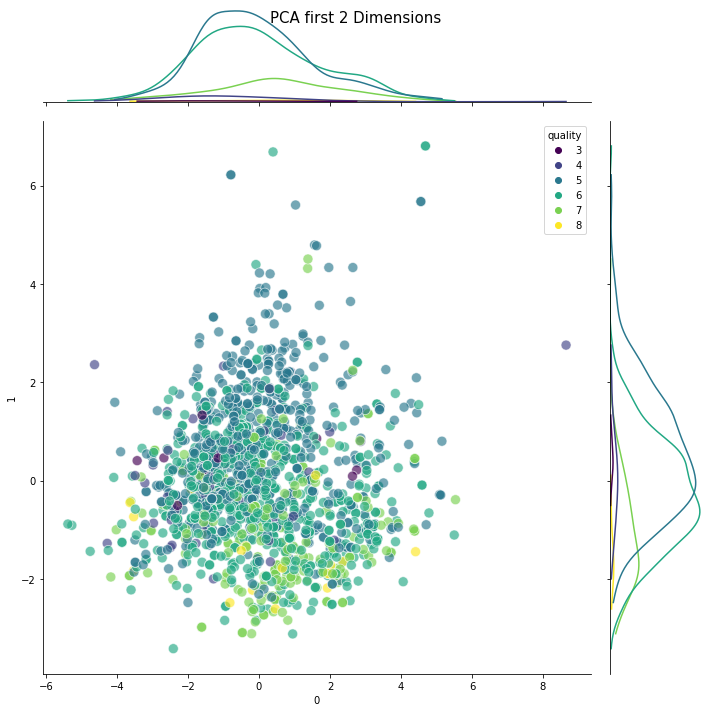

In [10]:
scatterPlot(x=0,y=1,df=Reduced,color=Data.quality, main_title="PCA first 2 Dimensions")

In [11]:
def barPlot(y, threshold):
    fig, axs = plt.subplots(1,2, figsize=(20,6))
    #plt.figure(figsize=(12,9))
    heights1=y
    heights2=y.cumsum()
    colors=heights2 >= threshold
    
    axs[0].bar(height=heights1, x=range(1,len(y)+1), width=0.8, color=["black" if x == True else "maroon" for x in colors])
    axs[0].set_xticks(ticks=range(1,len(y)+1))
    axs[0].set_yticks(ticks=np.array(list(range(0,11)))/10)
    
    axs[1].bar(height=heights2, x=range(1,len(y)+1), width=0.8, color=["black" if x == True else "maroon" for x in colors])
    axs[1].axhline(y=threshold, xmin=0, xmax=3, c="black")
    axs[1].set_xticks(ticks=range(1,len(y)+1))
    axs[1].set_yticks(ticks=np.array(list(range(0,11)))/10)
    axs[1].set_title("Cumul. Variance with " + str(sum(colors == False)+1) + " Components")
    plt.show()

Let's take a look at the variance of the components individually as well as cumulatively.

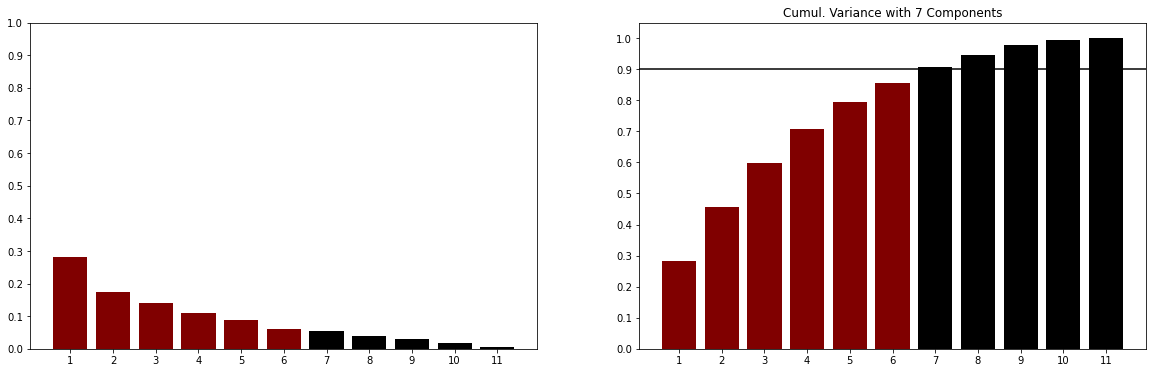

In [12]:
barPlot(y=pca.explained_variance_ratio_, threshold=0.9)

You can see that already with 7 components more than 90% of the variance is reached.

How much variance is contained in these two dimensions. Well, we could just look at the barplots and see the result. However, I promised to come back to the calculation of the variance. The variance of the original data set is, as we know, exactly the variance of all components. Thus, we only need to sum up.

In [13]:
def total_variance(DF, subDF):
    variance, subVariance = 0, 0
    
    for c in DF.drop(columns=["quality"]).columns:
        variance = variance + np.var(DF["{0}".format(c)])
        
    for s in range(len(subDF.columns)):
        subVariance = subVariance + np.var(subDF.iloc[:,s])    
        
    result = "Variance left in reduced dimensions: " + str(round(subVariance / variance * 100, 1)) + " %"
    return result

In [14]:
total_variance(Data, Reduced.iloc[:,[0,1]])

'Variance left in reduced dimensions: 45.7 %'

An interesting question would be which method provides the most information in the two dimensions. One could take the two dimensions and try to explain the original data set, dimension by dimension, with them. The better this works, the more information should be contained. But be careful, the correlations between the reduced dimensions and the original data set are not necessarily linear. Thus we have to take a method that takes this non-linearity into account. Here I chose a Gradient Boosting Regressor with default parameters, because it adapts very well also non-linear correlations. To assess how good the explanatory power is, the R-square score, and the maximum error are used.

In [15]:
def Comparison(DF, subDF):
    """this function fits a svr with the reduced data as predictors to each original column iteratively with a loop. \n
 regression target = original column \n predictors = all columns for the reduced dataset"""
    
    DF=DF.copy()
    subDF=subDF.copy()
    subDF.columns=[str(i) for i in subDF.columns]
    
    r2=[]
    mae=[]
    maxErr=[]
    model = GBR()
    
    for i in range(DF.shape[1]):
        model.fit(X=subDF, y=DF.iloc[:,i])
        pred = model.predict(X=subDF)
        #r2.append(model.score(X=subDF, y=DF.iloc[:,i]))
        r2.append(r2_score(y_true=DF.iloc[:,i], y_pred=pred))
        mae.append(mean_absolute_error(y_true=DF.iloc[:,i], y_pred=pred))
        maxErr.append(max_error(y_true=DF.iloc[:,i], y_pred=pred))
        
        
    return r2, mae, maxErr

In [16]:
pcar2, pcamae, pcamaxerr=Comparison(Data, Reduced.iloc[:,[0,1]])

<font size="+2" color="grey"><b>1.2 t-SNE (t-Distributed Stochastic Neighbor Embedding) </b></font><br><a id="1.2"></a>
<a href="#top" class="btn-xs btn-danger" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go back to the TOP</a>

In this method, a gradient descent is used to project high-dimensional clusters onto low-dimensional space and, by shifting the individual observations, to recover the relative distance between two points that were close to each other in high-dimensional space. This, of course, means that the method tends to focus on local structures. An important difference to PCA is that the resulting components are not necessarily linear to the original data. Most important parameters are:

* perplexity (controls focus on local or global structure)
* no. of components

In [17]:
tSNE = TSNE(
    n_components=2, 
    perplexity=60,
    init = 'random'
    )

transformed = tSNE.fit_transform(Data.drop(columns=["quality"]))

In [18]:
Reduced = pd.DataFrame(transformed)

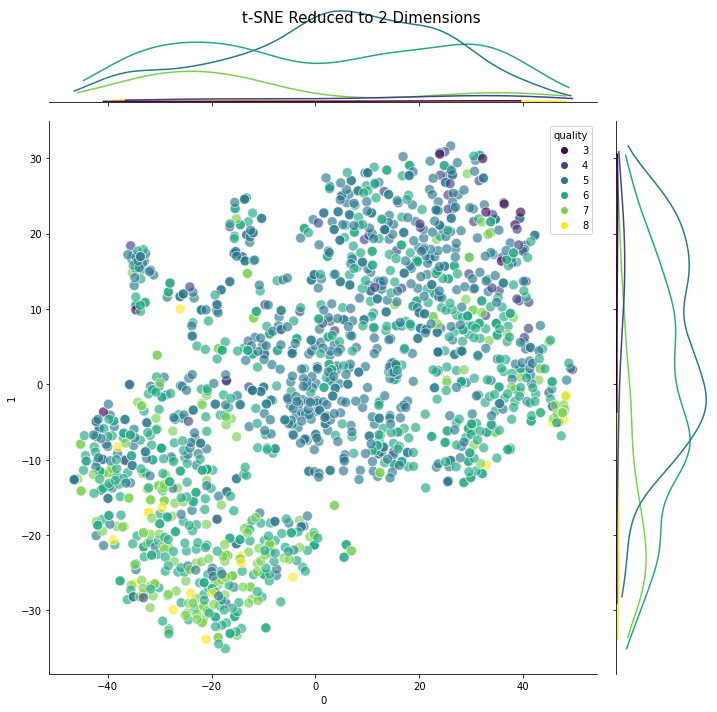

In [19]:
scatterPlot(x=0,y=1,df=Reduced,color=Data.quality, main_title="t-SNE Reduced to 2 Dimensions")

In [20]:
tSNEr2, tSNEmae, tSNEmaxerr=Comparison(Data, Reduced.iloc[:,[0,1]])

<font size="+2" color="grey"><b>1.3 UMAP (Uniform Manifold Approximation and Projection) </b></font><br><a id="1.3"></a>
<a href="#top" class="btn-xs btn-danger" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go back to the TOP</a>

This method works basically similar to t-SNE. Here, too, the clusters of the high-dimensional space are tried to be restored in the low-dimensional space. However, a graph is constructed, which is to be regarded as a learned hypothesis. This leads to the fact that this hypothesis can be applied also to unseen observations. Overall, UMAP is faster than t-SNE and minimally better at reconstructing global structures. Most important parameters are:

* no. of neighbors (controls focus on local or global structure)
* minimum distance
* no. of components

In [21]:
UMP = umap.UMAP(
    n_neighbors=20, 
    min_dist=0.5,
    n_components=2,
    spread=3
    )
transformed = UMP.fit_transform(Data.drop(columns=["quality"]))

In [22]:
Reduced = pd.DataFrame(transformed)

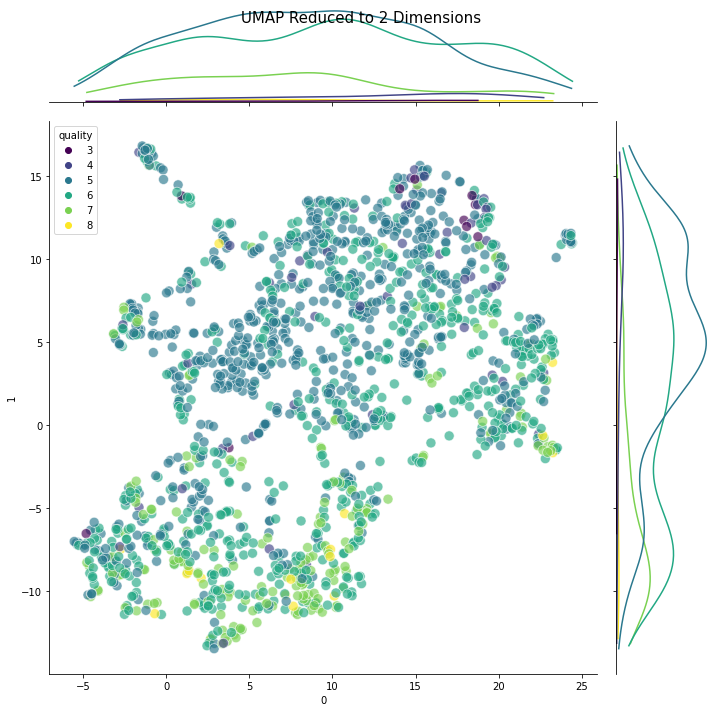

In [23]:
scatterPlot(x=0,y=1,df=Reduced,color=Data.quality, main_title="UMAP Reduced to 2 Dimensions")

In [24]:
UMPr2, UMPmae, UMPmaxerr=Comparison(Data, Reduced.iloc[:,[0,1]])

<font size="+2" color="grey"><b>1.4 TriMap (Triplets Manifold Approximation and Projection) </b></font><br><a id="1.4"></a>
<a href="#top" class="btn-xs btn-danger" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go back to the TOP</a>

The algorithm attempts to compute an embedding that preserves the order of the
distances within a subset of triplets (set of three observations). This subset usually consists of a k-nearest neighbor and another
observation with respect to a focused observation, and random triplets
which consist of two nonneighbors. This method focuses on the area of local and global structure. Most important parameters are:

* n_inliers (Number of nearest neighbors for forming the nearest neighbor triplets)
* n_outliers (Number of outliers for forming the nearest neighbor triplets)
* n_random (Number of random triplets per point)

In [25]:
TriMap = trimap.TRIMAP(
    n_inliers=10, 
    n_outliers=50, 
    n_random=5, 
    apply_pca=False,
    verbose=False
    )

transformed = TriMap.fit_transform(Data.drop(columns=["quality"]).values)

In [26]:
Reduced = pd.DataFrame(transformed)

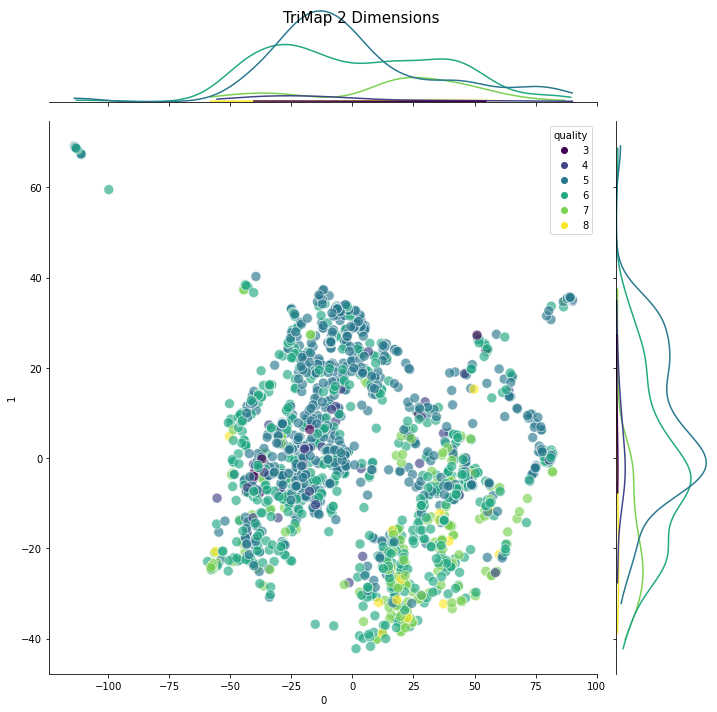

In [27]:
scatterPlot(x=0,y=1,df=Reduced,color=Data.quality, main_title="TriMap 2 Dimensions")

In [28]:
TriMapr2, TriMapmae, TriMapmaxerr=Comparison(Data, Reduced.iloc[:,[0,1]])

<font size="+2" color="grey"><b>1.5 PaCMAP (Pairwise Controlled Manifold Approximation Projection) </b></font><br><a id="1.5"></a>
<a href="#top" class="btn-xs btn-danger" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go back to the TOP</a>

The Pairwise Controlled Manifold Approximation Projection (PaCMAP) preserves both local and global structure. To achieve this, the method uses a well defined foss function as well as a special graph optimization technique. Most important parameters:

* n_neighbors (number of neighbors considered in the k-Nearest Neighbor graph)
* MN_ratio (the ratio of the number of mid-near pairs to the number of neighbors)
* FP_ratio (the ratio of the number of further pairs to the number of neighbors)

In [29]:
PaCMAP = pacmap.PaCMAP(
    n_dims=2, 
    n_neighbors=5, 
    MN_ratio=0.5, 
    FP_ratio=2.0
    ) 

transformed = PaCMAP.fit_transform(Data.drop(columns=["quality"]).values)

In [30]:
Reduced = pd.DataFrame(transformed)

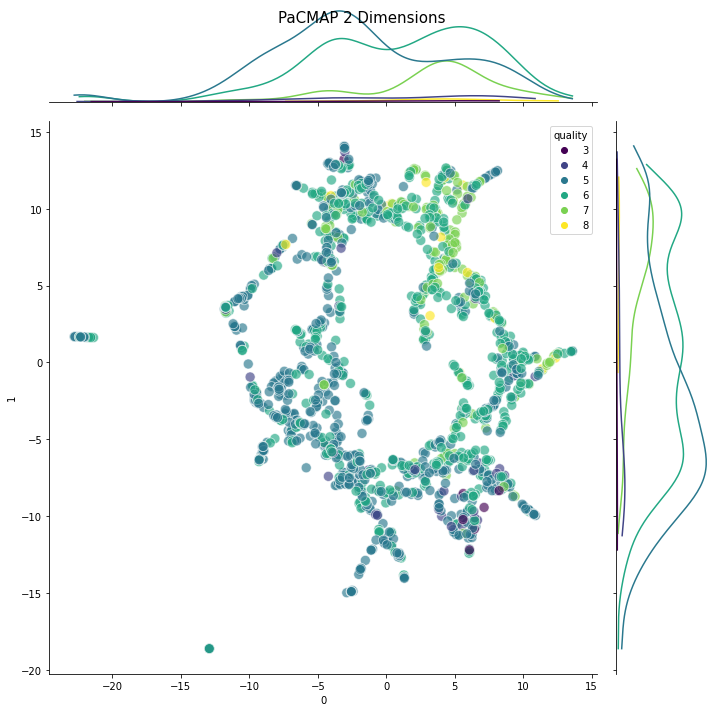

In [31]:
scatterPlot(x=0,y=1,df=Reduced,color=Data.quality, main_title="PaCMAP 2 Dimensions")

In [32]:
PaCMAPr2, PaCMAPmae, PaCMAPmaxerr=Comparison(Data, Reduced.iloc[:,[0,1]])

<font size="+2" color="grey"><b>1.6 Autoencoder </b></font><br><a id="1.6"></a>
<a href="#top" class="btn-xs btn-danger" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go back to the TOP</a>

An autoencoder is a neural network that takes as input a data set and usually predicts it as a target. The autoencoder thus learns its own input. However, the input is compressed and reduced to a low-dimensional space (bottleneck). This is done by the encoder. Afterwards, the original data set is restored from the low-dimensional vectors via the decoder. The nice thing about this is that you can use metrics to check the quality of the autoencoder. If the autoencoder does a very good job of recreating the original dataset, much of the total information contained in the dataset should exist in the bottleneck.

In [33]:
np.random.seed(123)
tf.random.set_seed(123)

comp=2
  
INPUT = ks.layers.Input(shape=(Data.drop(columns=["quality"]).shape[1]), name="EncoderInput")

#ENCO = ks.layers.BatchNormalization()(INPUT)
ENCO = ks.layers.Dense(32, activation='relu')(INPUT)

ENCO = ks.layers.Dropout(0.1)(ENCO)
ENCO = ks.layers.BatchNormalization()(ENCO)
ENCO = ks.layers.Dense(16, activation='relu')(ENCO)

ENCO = ks.layers.Dropout(0.1)(ENCO)
ENCO = ks.layers.BatchNormalization()(ENCO)
ENCO = ks.layers.Dense(comp, activation='linear', name="compresseion")(ENCO)

ENC = ks.Model(inputs=INPUT, outputs=ENCO)

DECO = ks.layers.BatchNormalization()(ENCO)
DECO = ks.layers.Dense(16, activation='relu')(DECO)

DECO = ks.layers.Dropout(0.1)(DECO)
DECO = ks.layers.BatchNormalization()(DECO)
DECO = ks.layers.Dense(32, activation='relu')(DECO)

DECO = ks.layers.Dropout(0.1)(DECO)
DECO = ks.layers.BatchNormalization()(DECO)
DECO = ks.layers.Dense(Data.drop(columns=["quality"]).shape[1], activation='linear')(DECO)

AE = ks.Model(inputs=INPUT, outputs=DECO)

So this is the structure of the autoencoder.

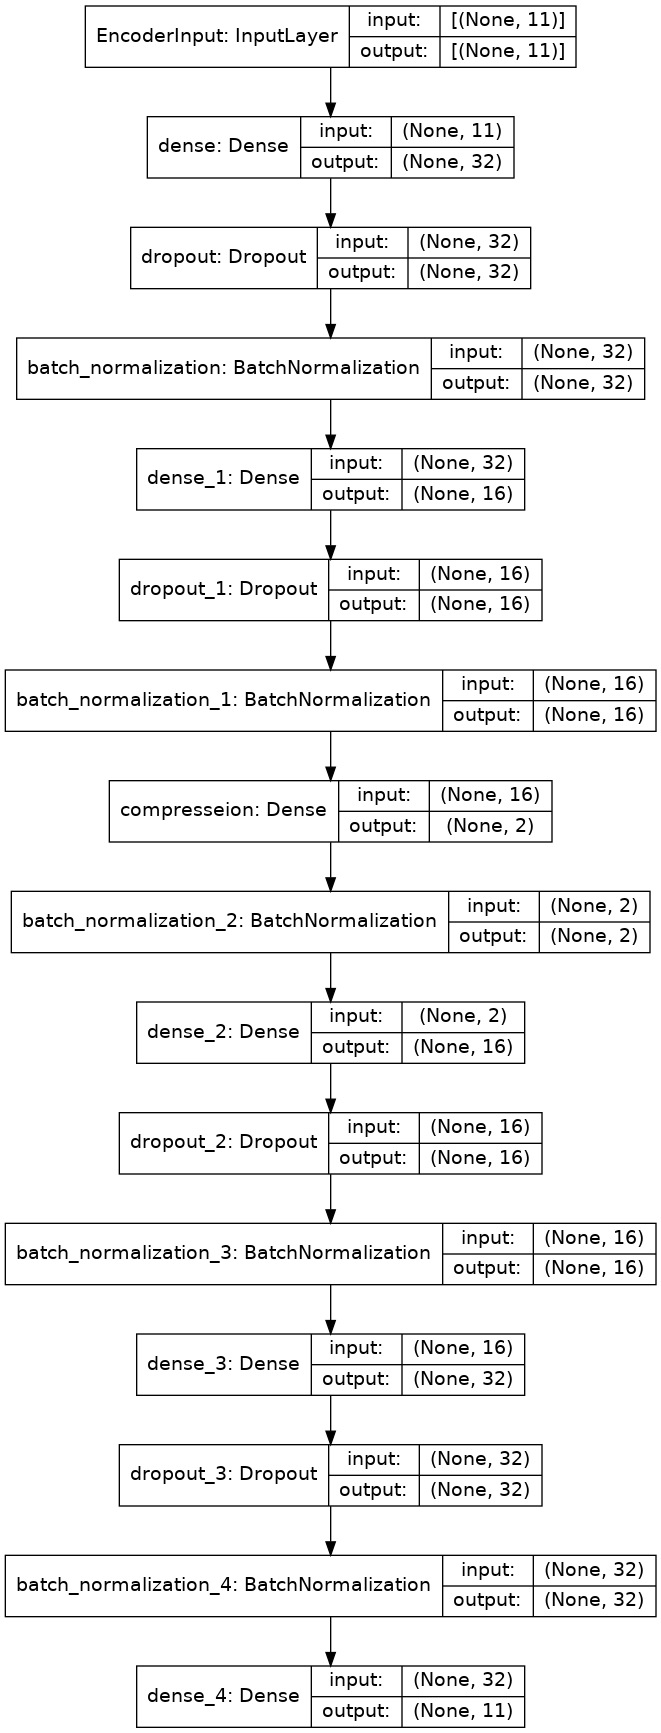

In [34]:
ks.utils.plot_model(
    AE, 
    show_shapes=True, 
    show_layer_names=True
    )

In [35]:
def rmse(y_pred, y_true):
    y_pred = tf.cast(y_pred, dtype="float32")
    y_true = tf.cast(y_true, dtype="float32")
    r = tf.sqrt(tf.keras.backend.mean(tf.square(y_pred - y_true)))
    return r

In [36]:
stop = ks.callbacks.EarlyStopping(
    monitor='mae', 
    min_delta=0.000001, 
    patience=100, 
    mode='max'
    )

lrReducer = ks.callbacks.ReduceLROnPlateau(    
    monitor="val_loss",
    factor=0.5,
    patience=10,
    verbose=0,
    mode="auto",
    min_delta=0.0001,
    cooldown=0,
    min_lr=0.000001,
    )

I have found that large initial learning rates and large batch sizes lead to significantly better results.

In [37]:
eps=1500
bs=1600
leRa=0.1
dec = 0.0000

"Learning rate and decay ok?: " + str(leRa - dec * eps > 0)

'Learning rate and decay ok?: True'

In [38]:
optimizer = ks.optimizers.Adamax(lr=leRa, decay=dec)
AE.compile(optimizer = optimizer, loss = rmse, metrics = ["mae"])

I wonder what low-dimensional space would look like if we just used the untrained encoder. Let's just give it a try.

In [39]:
Reduced = ENC.predict(
   x=Data.drop(columns=["quality"]), 
   workers = 1, 
   use_multiprocessing = True
)

Reduced = pd.DataFrame(Reduced)

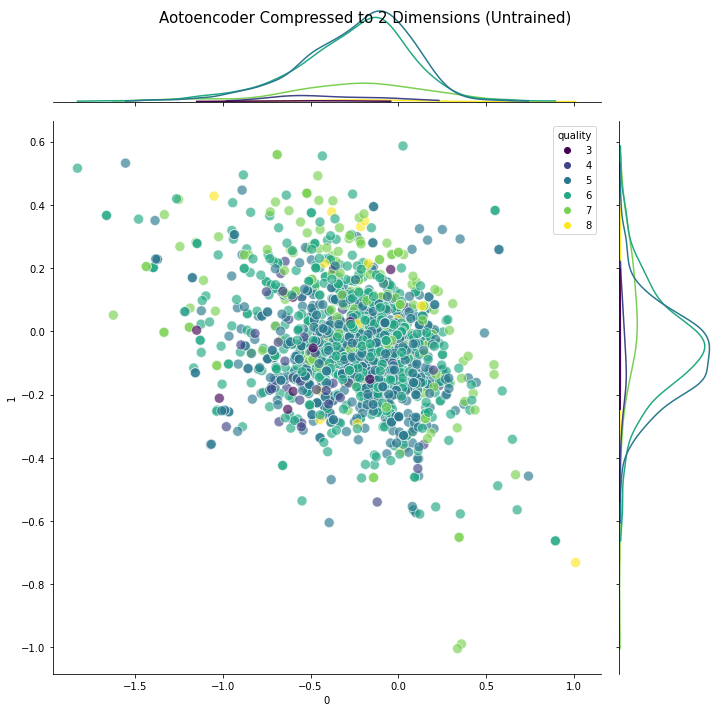

In [40]:
scatterPlot(x=0,y=1,df=Reduced,color=Data.quality, main_title="Aotoencoder Compressed to " + str(comp) + " Dimensions (Untrained)")

Lets train the autoencoder.

In [41]:
history = ks.callbacks.History()

AE.fit(
    x=Data.drop(columns=["quality"]), 
    y=Data.drop(columns=["quality"]), 
    epochs = eps, 
    batch_size = bs, 
    shuffle = False,
    callbacks=[history, lrReducer],
    verbose=0
    )

print(AE.evaluate(Data.drop(columns=["quality"]), Data.drop(columns=["quality"])))

#print(history.history)

50/50 [==============================] - 0s 969us/step - loss: 0.6029 - mae: 0.4622
[0.6029419302940369, 0.4621674120426178]


Let's see if the original image has changed. Note, we have set a seed.

In [42]:
Reduced = ENC.predict(
   x=Data.drop(columns=["quality"]), 
   workers = 1, 
   use_multiprocessing = True
)

Reduced = pd.DataFrame(Reduced)

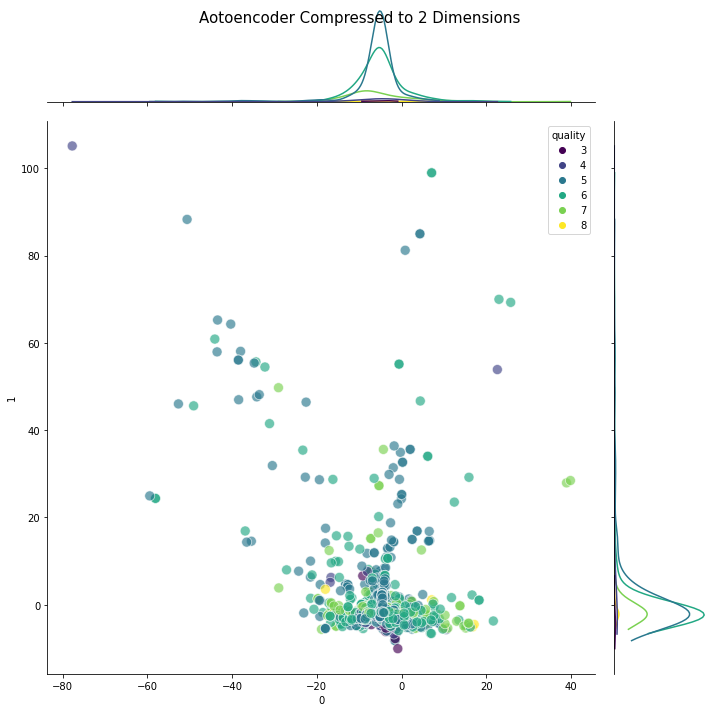

In [43]:
scatterPlot(x=0,y=1,df=Reduced,color=Data.quality, main_title="Aotoencoder Compressed to " + str(comp) + " Dimensions")

In [44]:
autoEncr2, autoEncmae, autoEncmaxerr=Comparison(Data, Reduced.iloc[:,[0,1]])

<font size="+2" color="grey"><b>1.7 Comparison </b></font><br><a id="1.7"></a>
<a href="#top" class="btn-xs btn-danger" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go back to the TOP</a>

Now comes the comparison, where we simply try to explain each variable in the data set with the two dimensions. The distribution of the RSquares is shown. 

> Note that the coefficient of determination R squared measures linear correlations, but between the target (here, the respective feature of the data set) and the model output. Even though the relationships between the reduced dimensions of the methods and the original data set need not be linear.

In [45]:
def compare(dfList, method_names, title="Comparison R² Score"):

    fig, ax = plt.subplots(figsize=(16,9))
    ax.set_title(title)

    custom_lines = [
        plt.Line2D([0], [0], color="#20A387FF", lw=3),
        plt.Line2D([0], [0], color="#440154FF", lw=3)
        ]

    ax.legend(custom_lines, ['Median', 'Mean'])

    violin_parts = ax.violinplot(
        dfList, 
        showmeans =True, 
        vert=True, 
        widths=0.75, 
        showmedians=True, 
        showextrema=False
        )

    plt.xticks(range(1,len(method_names)+1), method_names)

    for pc in violin_parts['bodies']:
        pc.set_facecolor('#3CBB75FF')
        pc.set_edgecolor('#404788FF')
        pc.set_linewidth(2)
        pc.set_alpha(0.3)

    for partname in ('cmedians', 'cmeans'):
        vp = violin_parts[partname]
        if partname == 'cmedians':
            vp.set_edgecolor('#20A387FF')
            vp.set_linewidth(3)
        else:
            vp.set_edgecolor('#440154FF')
            vp.set_linewidth(3)

    plt.show()

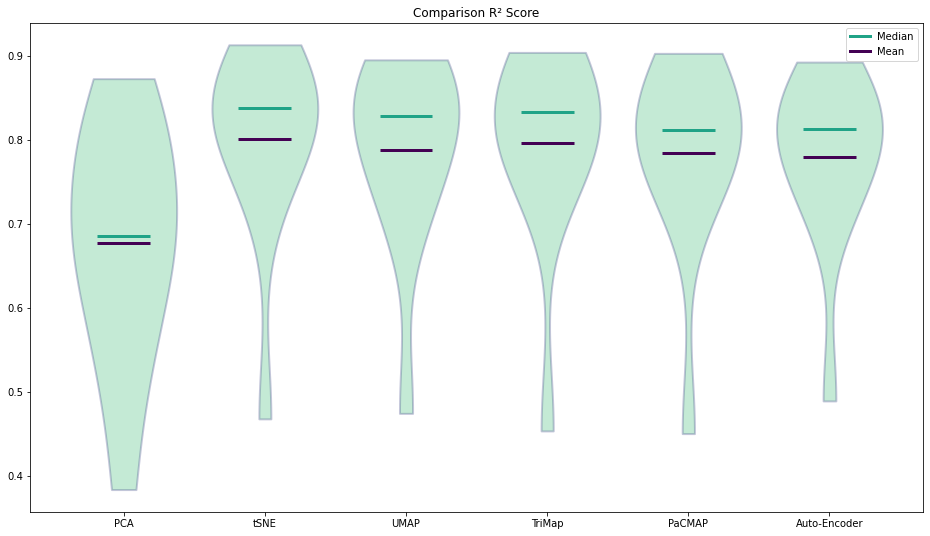

In [46]:
mNames=['PCA', 'tSNE', 'UMAP', 'TriMap', 'PaCMAP', 'Auto-Encoder']

comDF=[pcar2, tSNEr2, UMPr2, TriMapr2, PaCMAPr2, autoEncr2]
compare(comDF, mNames)

In [47]:
#comDF=[pcamae, tSNEmae, UMPmae, TriMapmae, PaCMAPmae, autoEncmae]
#compare(comDF, mNames, title="Comparison MAE Score")

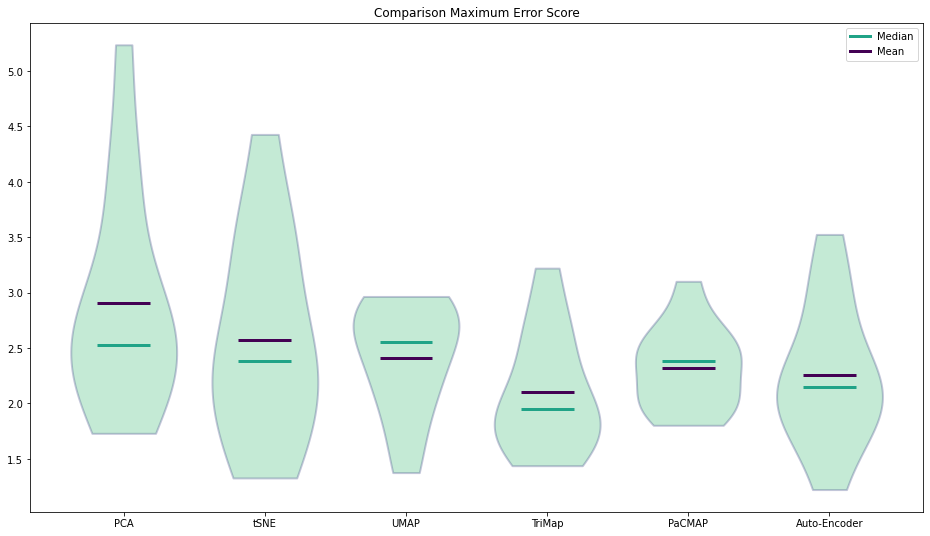

In [48]:
comDF=[pcamaxerr, tSNEmaxerr, UMPmaxerr, TriMapmaxerr, PaCMAPmaxerr, autoEncmaxerr]
compare(comDF, mNames, title="Comparison Maximum Error Score")

Based on the R-Square t-SNE, PaCMAP and TriMap take the most information in two dimensions. This is closely followed by UMAP and Autoencoders. PCA brings the lowest explanatory power. Probably because the observed correlations are not linear.

Based on the maximum error, PaCMAP and TriMap show the most robust results followed by Autoencoders and UMAP. t-SNE and PCA bring up the rear.

<font size="+3" color="grey"><b>2. A somewhat Simpler Dataset </b></font><br><a id="2"></a>
<a href="#top" class="btn-xs btn-danger" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go back to the TOP</a>

The [ModelNet40 - Princeton 3D Object Dataset](https://www.kaggle.com/balraj98/modelnet40-princeton-3d-object-dataset) dataset is from [Balraj Ashwath](https://www.kaggle.com/balraj98) and shows 3D representations of objects. I have chosen here a modern airplane. 

![](https://storage.googleapis.com/kaggle-datasets-images/943894/1599485/e05e0b42b5ec14d76119be1c71cf7a66/data-original.png?t=2020-10-28-11-36-59)

In [49]:
with open("../input/modelnet40-princeton-3d-object-dataset/ModelNet40/airplane/train/airplane_0200.off") as raw:

    df = []
    try:
        for line in raw:
            row = raw.readline().strip().split(" ")
            if "OFF" not in row:
                df.append([float(i) for i in row])
    except Exception as e:
        print(line)
               
df=pd.DataFrame(df)
df=df.loc[pd.isna(df[3]),[0,1,2]]
df=df.loc[1:,:]

df.columns = ["x", "y", "z"]

def coloring(row):
    
    if (row["z"] >= 137) & (row["y"] >= 1136) & ((row["x"] >= 1334.27) | (row["x"] <= 1041.04)):
        c = "red"
    elif (row["y"] <= 1098.2) & ((row["x"] >= 1400) | (row["x"] <= 905)):
        c = "green"
    elif (row["z"] > 80) & ((row["x"] < 1400) | (row["x"] > 905)):
        c = "purple"
    else:
        c = "black"
    return c

df["component"] = df.apply(coloring, axis="columns")

x,y,z,component=df["x"],df["y"],df["z"],df["component"]

dfNormal = Normalization(df, ["x", "y", "z"])

In [50]:
fig = go.Figure(
    data=[
        go.Scatter3d(
            x=x, 
            y=y, 
            z=z,
            mode='markers',
            marker=dict(
                size=5,
                opacity=0.9,
                line =dict(color= "white"),
                color=component
            )
        )])
fig.update_layout(height=800, width=800, title_text="Airplane", template="simple_white")
fig.show()

<font size="+2" color="grey"><b>2.1 Reduction </b></font><br><a id="2.1"></a>
<a href="#top" class="btn-xs btn-danger" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go back to the TOP</a>

Now we convert the 3D into a 2D structure.

In [51]:
PCA3D = PCA(2)
tSNE3D = TSNE(n_components=2, perplexity=250)
UMAP3D = umap.UMAP(n_components=2, n_neighbors=350)
TriMap3D = trimap.TRIMAP(verbose=False, n_inliers=20, n_outliers=50, n_random=10)
PaCMAP3D = pacmap.PaCMAP(n_dims=2, n_neighbors=50) 

methods={
    "PCA": PCA3D,
    "tSNE": tSNE3D,
    "UMAP": UMAP3D,
    "TriMap": TriMap3D,
    "PaCMAP": PaCMAP3D
}

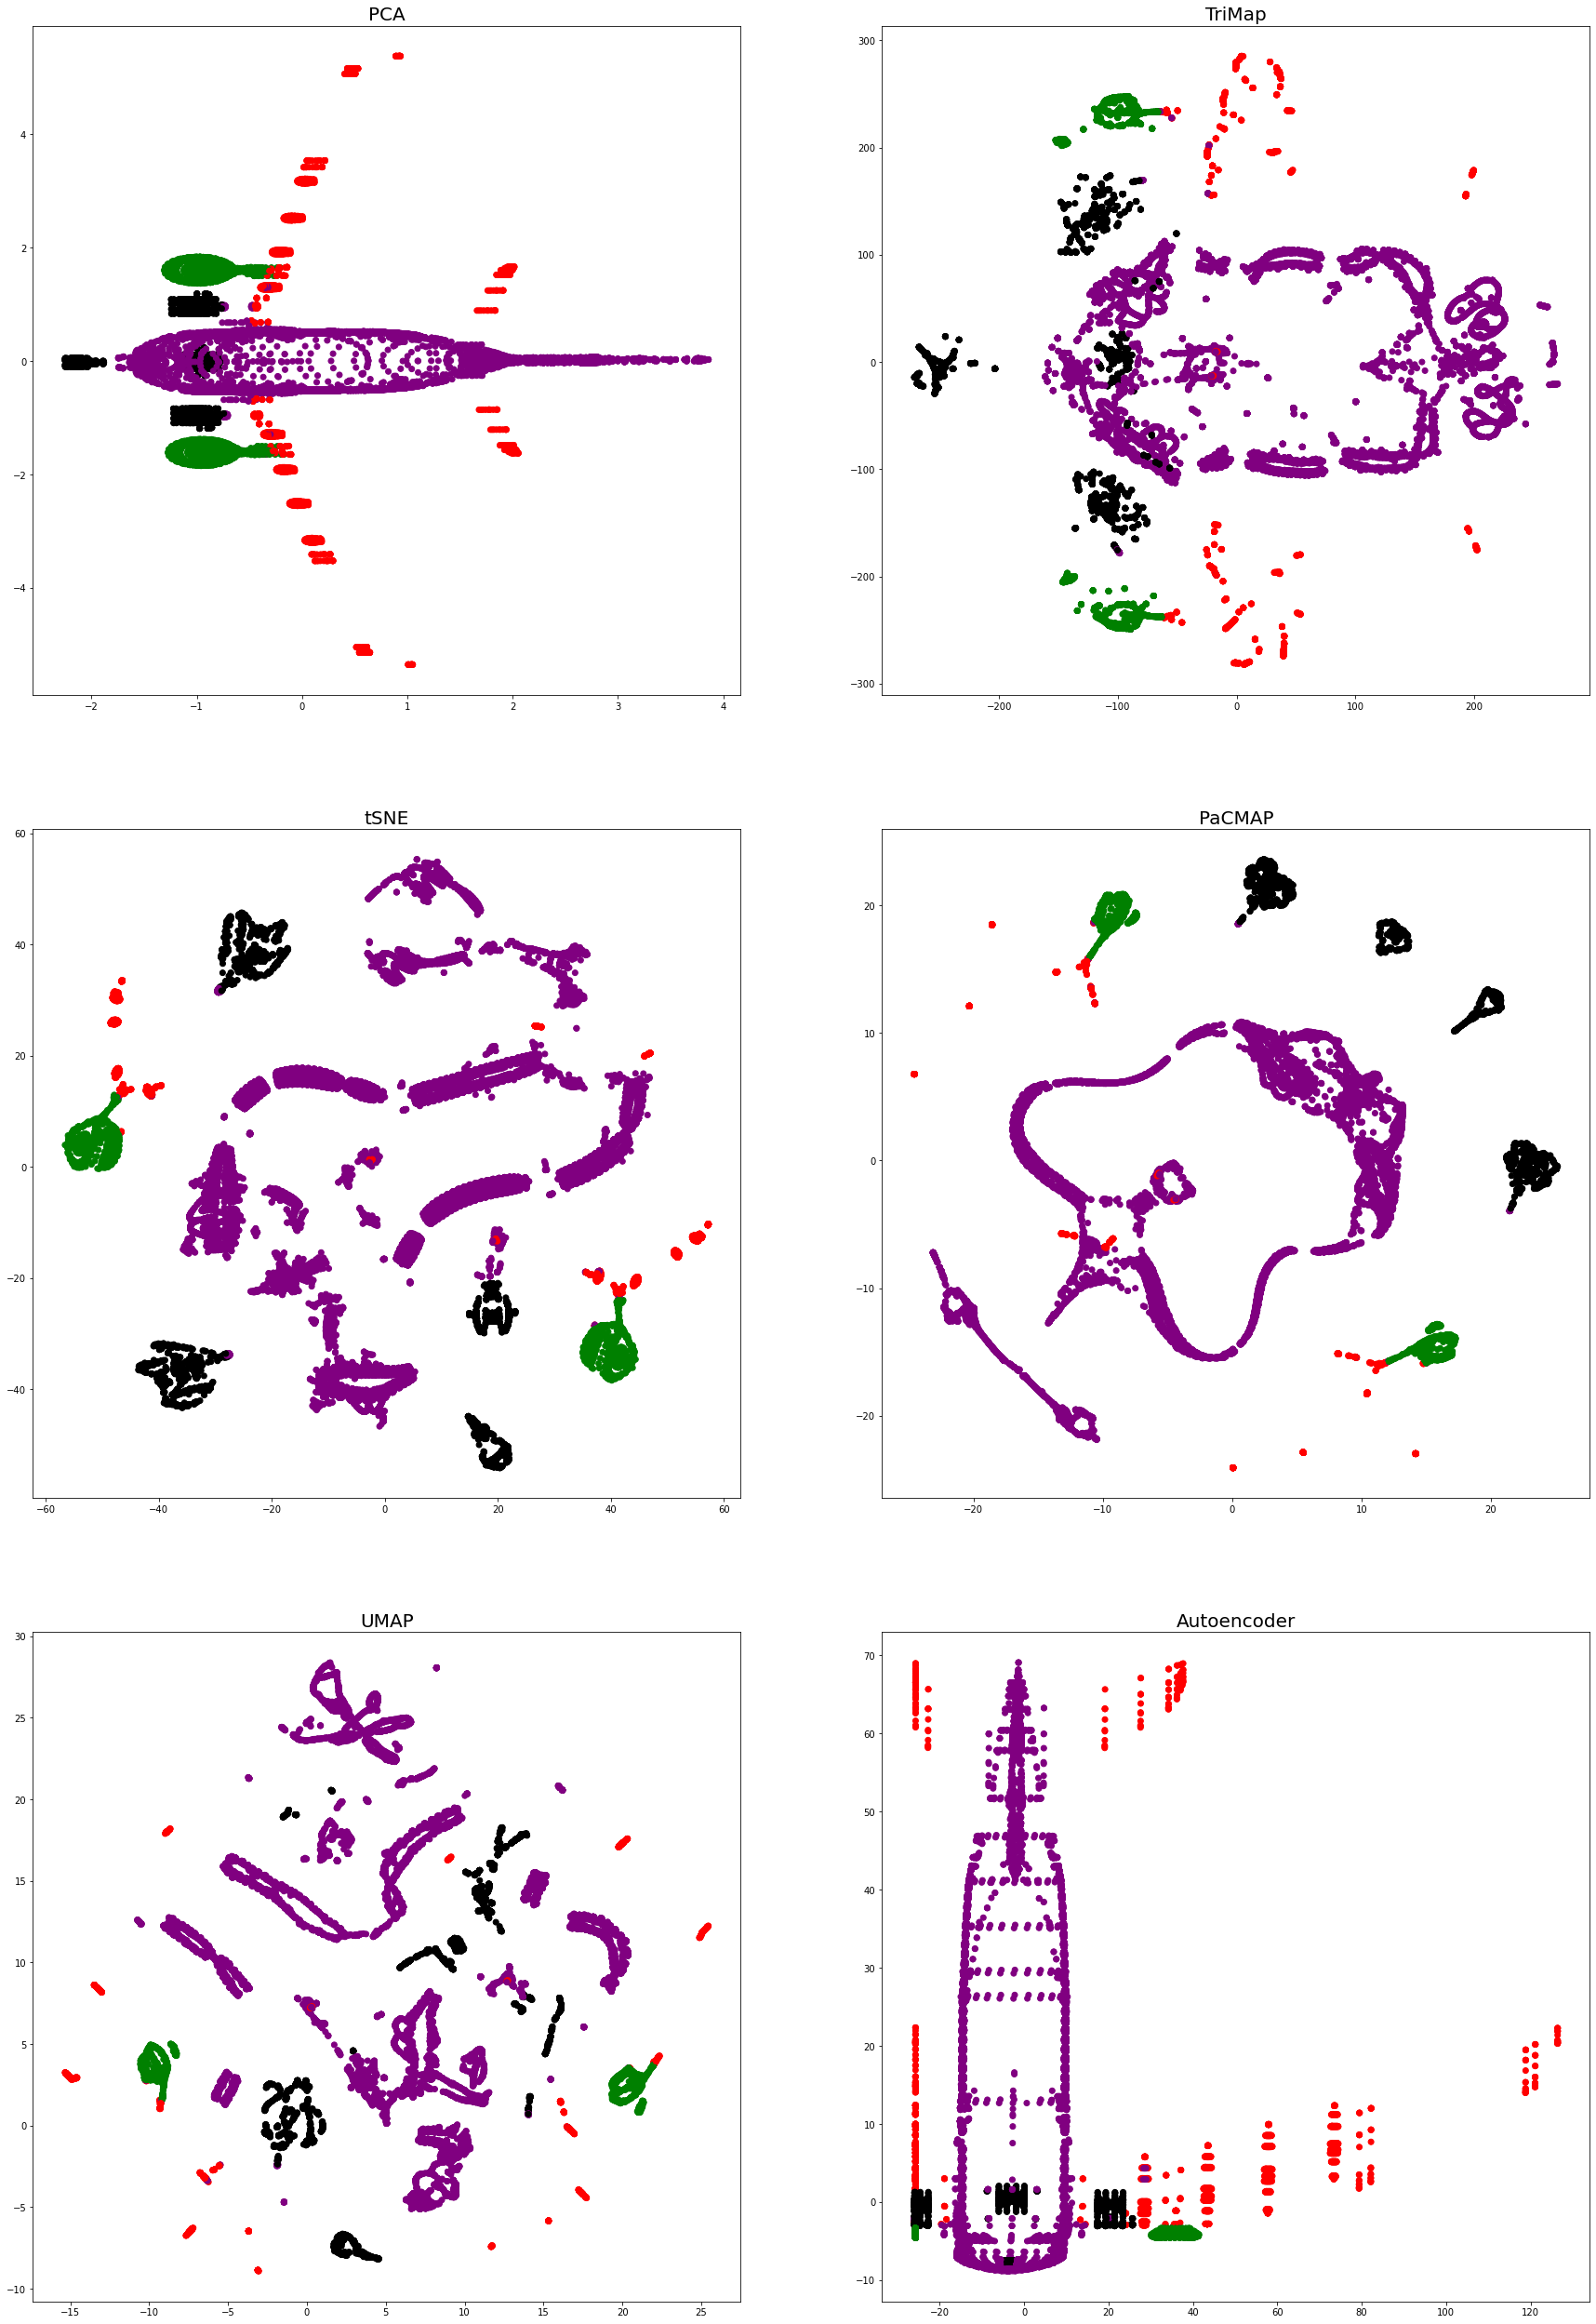

In [52]:
fig, p = plt.subplots(nrows=3, ncols=2, figsize=(20*1.5,30*1.5))

c=0
r=0
k=0

for c in range(2):
    for r in range(3):
        if k < 5:
            transformed=list(methods.values())[k].fit_transform(dfNormal[["x", "y", "z"]].values)
            Reduced = pd.DataFrame(transformed)
            p[r, c].scatter(
                x=Reduced[0],
                y=Reduced[1],
                c=component
                )
            p[r, c].set_title(list(methods.keys())[k], fontsize=20)
            
            globals()[f"{list(methods.keys())[k]}r2"], globals()[f"{list(methods.keys())[k]}mae"], globals()[f"{list(methods.keys())[k]}maxErr"] \
            =Comparison(df[["x", "y", "z"]], Reduced.iloc[:,[0,1]])
            
            k+=1
        else:
            np.random.seed(123)
            tf.random.set_seed(123)
            
            comp=2
  
            INPUT = ks.layers.Input(shape=(dfNormal[["x", "y", "z"]].shape[1]), name="EncoderInput")

            ENCO = ks.layers.Dense(8, activation='relu')(INPUT)
            ENCO = ks.layers.Dropout(0.1)(ENCO)
            ENCO = ks.layers.BatchNormalization()(ENCO)
            ENCO = ks.layers.Dense(comp, activation='linear', name="compresseion")(ENCO)

            ENC3D = ks.Model(inputs=INPUT, outputs=ENCO)

            DECO = ks.layers.Dropout(0.1)(ENCO)
            DECO = ks.layers.BatchNormalization()(DECO)
            DECO = ks.layers.Dense(8, activation='relu')(DECO)
            DECO = ks.layers.Dropout(0.1)(DECO)
            DECO = ks.layers.BatchNormalization()(DECO)
            DECO = ks.layers.Dense(df[["x", "y", "z"]].shape[1], activation='linear')(DECO)

            AE3D = ks.Model(inputs=INPUT, outputs=DECO)
            
            optimizer3D = ks.optimizers.Adamax(lr=0.1)
            AE3D.compile(optimizer = optimizer3D, loss = "mae", metrics = ["mae"])
            
            AE3D.fit(
                x=dfNormal[["x", "y", "z"]], 
                y=df[["x", "y", "z"]], 
                epochs = 2000, 
                batch_size = df.shape[0], 
                shuffle = False,
                callbacks=[lrReducer],
                verbose=0
            )

            Reduced=ENC3D.predict(
               x=dfNormal[["x", "y", "z"]], 
               workers = 1, 
               use_multiprocessing = True
            )

            Reduced = pd.DataFrame(Reduced)
                  
            p[r, c].scatter(
                x=Reduced[0],
                y=Reduced[1],
                c=component
                )
            p[r, c].set_title("Autoencoder", fontsize=20)
            
            Autoencoderr2, Autoencodermae, AutoencodermaxErr \
            =Comparison(df[["x", "y", "z"]], Reduced.iloc[:,[0,1]])
plt.show()

Why does PCA look so perfect now? Well, the answer lies in the method. PCA lays a linear hyperplane through the multidimensional space and then sorts the residuals by variance in descending order. Thus, all we have is a linear projection on from 3 to 2 dimensions. Is this good? In this case, yes, because a 3D plane is composed of linear polygons. PCA is the only method that necessarily projects linearly. All other methods are not necessarily linear. The other methods do not have this additional information in this case. Therefore PCA wins here. 

<font size="+2" color="grey"><b>2.2 Comparison </b></font><br><a id="2.2"></a>
<a href="#top" class="btn-xs btn-danger" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go back to the TOP</a>

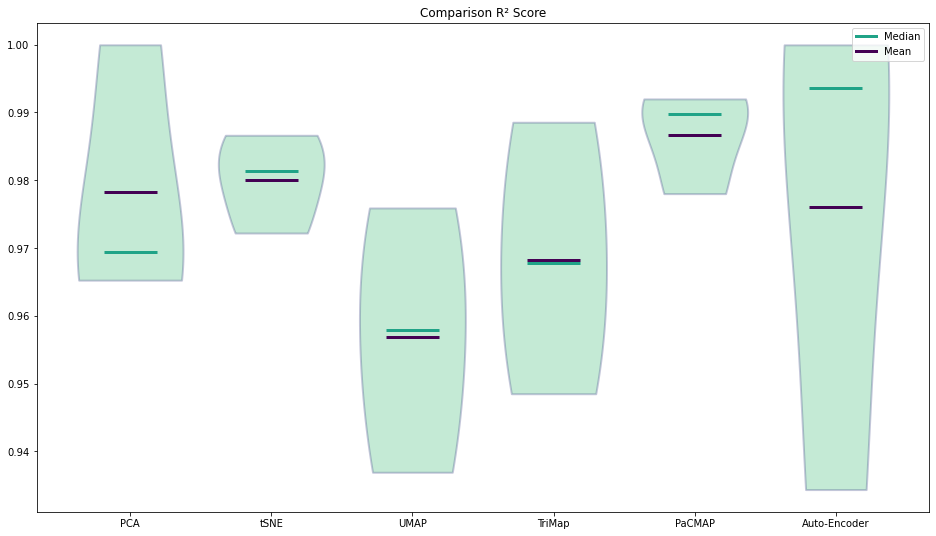

In [53]:
comDF=[PCAr2, tSNEr2, UMAPr2, TriMapr2, PaCMAPr2, Autoencoderr2]
compare(comDF, mNames)

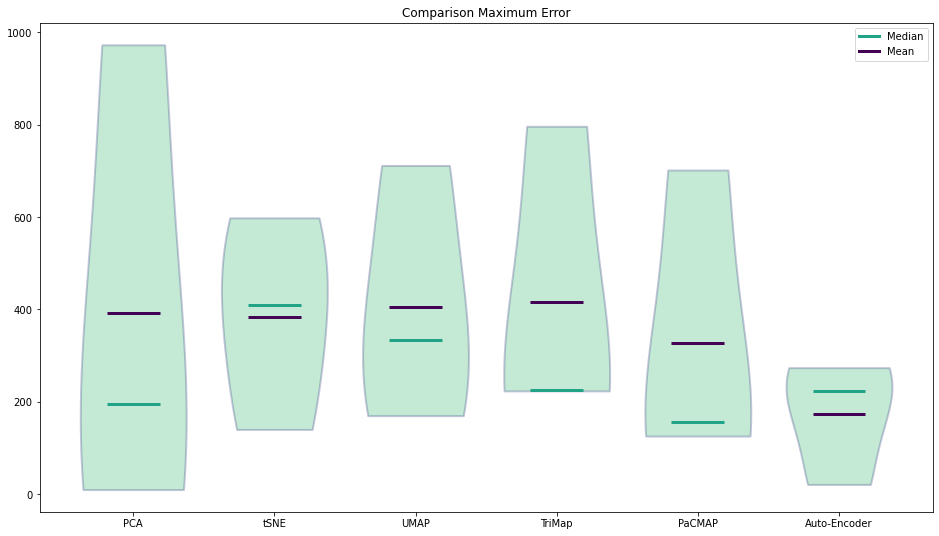

In [54]:
comDF=[PCAmaxErr, tSNEmaxErr, UMAPmaxErr, TriMapmaxErr, PaCMAPmaxErr, AutoencodermaxErr]
compare(comDF, mNames, title="Comparison Maximum Error")

The comparison by explanatory power also shows that PCA provides good results but PaCMAP and t-SNE are more stable. based on the maximum exxor, Autoencoders and t-SNE lead the ranking.

<font size="+2" color="grey"><b>3. Outlier Detection </b></font><br><a id="3"></a>
<a href="#top" class="btn-xs btn-danger" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go back to the TOP</a>

Lets go back to the wine dataset again to deal with outliers. We'll start simple for now, with vodka. Since there are only wines in the data set, vodka should be easy to find.

In [17]:
Data = pd.read_csv("./winequality-red.csv")
#vodka =  {Data.columns[key]: value for key, value in enumerate([0,0,0,0,0,0,0,0.916,6,0,40,8])}
#Data = Data.append(vodka, ignore_index=True)
Data.tail(n=2)

fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"
1597  5.9;0.645;0.12;2;0.075;32;44;0.99547;3.57;0.71...                                                                                                                     
1598  6;0.31;0.47;3.6;0.067;18;42;0.99549;3.39;0.66;...

We put the vodka in the testset.

In [18]:
kf = KFold(n_splits=2,random_state=123, shuffle=True)
for train_index, test_index in kf.split(Data):
    train = Normalization(DF=Data.loc[train_index], cols=Data.drop(columns=["quality"]).columns)
    test = Normalization(DF=Data.loc[test_index], cols=Data.drop(columns=["quality"]).columns)
    
test.alcohol.max()#So, Vodka is in the test set

KeyError: "['quality'] not found in axis"

 <font size="+2" color="grey"><b>3.1 Visual Analysis </b></font><br><a id="3.1"></a>
<a href="#top" class="btn-xs btn-danger" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go back to the TOP</a>

First, let's take a visual look. The vodka is marked in red here. By the way, the marking can be removed by double-clicking on the corresponding pH axis.

In [19]:
parCoOut = go.Figure(data=
    go.Parcoords(
        line = dict(color = Data['quality'],
                   colorscale = 'Tealrose',
                   showscale = True,
                   cmin = 3,
                   cmax = 8),
        dimensions = list([
            dict(label = "fixed acidity", 
                 values = Data['fixed acidity']),
            dict(label = 'volat. acidity', 
                 values = Data['volatile acidity']),
            dict(label = 'citric acid', 
                 values = Data['citric acid']),
            dict(label = 'res. sugar', 
                 values = Data['residual sugar']),
            dict(label = 'chlorides', 
                 values = Data['chlorides']),
            dict(label = 'free sulf. diox.', 
                 values = Data['free sulfur dioxide']),
            dict(label = 'tot. sulf. diox.', 
                 values = Data['total sulfur dioxide']),
            dict(label = 'density', 
                 values = Data['density']),
            dict(constraintrange = [5.9,6],
                 label = 'pH', 
                 values = Data['pH']),
            dict(label = 'sulphates', 
                 values = Data['sulphates']),
            dict(label = 'alcohol', 
                 values = Data['alcohol']),
            dict(label = 'quality', 
                 values = Data['quality']),
        ])
    )
)
parCoOut.show()

NameError: name 'go' is not defined

<font size="+2" color="grey"><b>3.2 PCA </b></font><br><a id="3.2"></a>
<a href="#top" class="btn-xs btn-danger" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go back to the TOP</a>

In [58]:
pca.fit(train.drop(columns=["quality"]))
transformed = pca.transform(test.drop(columns=["quality"]))
Reduced = pd.DataFrame(transformed)

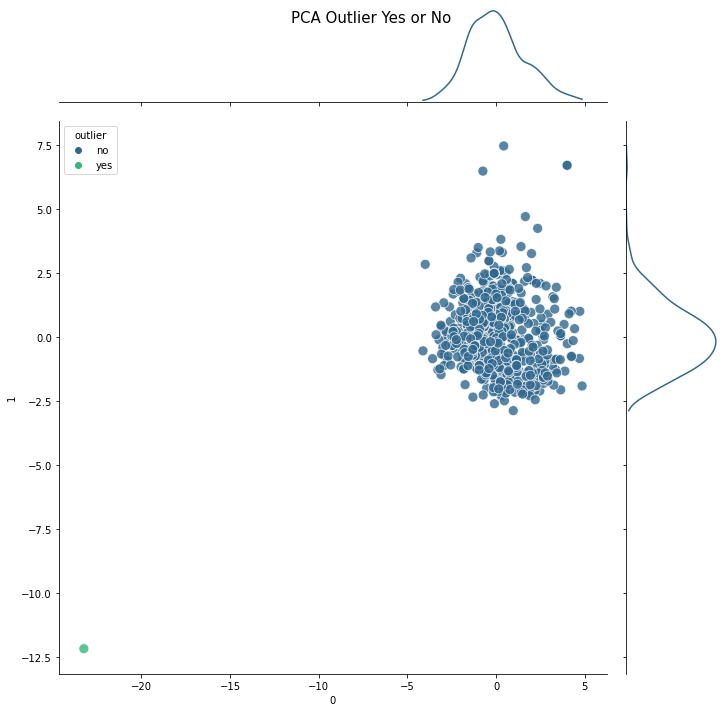

In [59]:
scatterPlot(
    x=0,
    y=1,
    df=Reduced,color=test.alcohol.map(lambda x: "yes" if x > 10 else "no").values,
    colorName="outlier",
    main_title="PCA Outlier Yes or No",
    a=0.8
    )

I think that worked, right?

<font size="+2" color="grey"><b>3.3 UMAP </b></font><br><a id="3.3"></a>
<a href="#top" class="btn-xs btn-danger" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go back to the TOP</a>

In [60]:
UMP.fit(train.drop(columns=["quality"]))
transformed = UMP.transform(test.drop(columns=["quality"]))
Reduced = (pd.DataFrame(transformed))

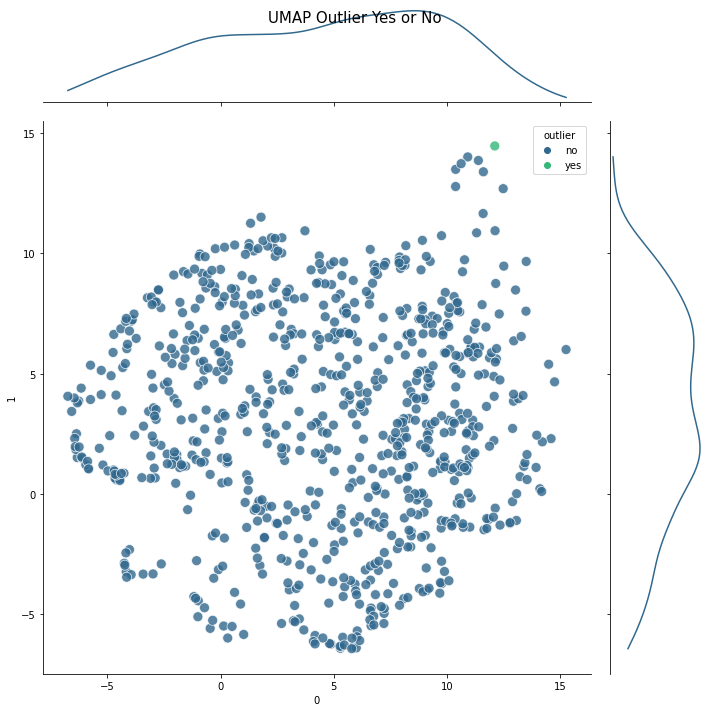

In [61]:
scatterPlot(
    x=0,
    y=1,
    df=Reduced,
    color=test.alcohol.map(lambda x: "yes" if x > 10 else "no").values,
    colorName="outlier",
    main_title="UMAP Outlier Yes or No",
    a=0.8
    )

UMAP tends to pull the outlier in.

<font size="+2" color="grey"><b>3.4 Autoencoder </b></font><br><a id="3.4"></a>
<a href="#top" class="btn-xs btn-danger" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go back to the TOP</a>

In [62]:
optimizer = ks.optimizers.Adam(lr=leRa, decay=dec)
AE.compile(optimizer = optimizer, loss = rmse)

history = ks.callbacks.History()

AE.fit(
    x=train.drop(columns=["quality"]), 
    y=train.drop(columns=["quality"]), 
    epochs = eps, 
    batch_size = bs, 
    shuffle = False,
    callbacks=[history],
    verbose=0
    )

Reduced = ENC.predict(
   x=test.drop(columns=["quality"]), 
   workers = 1, 
   use_multiprocessing = True
)

Reduced = pd.DataFrame(Reduced)

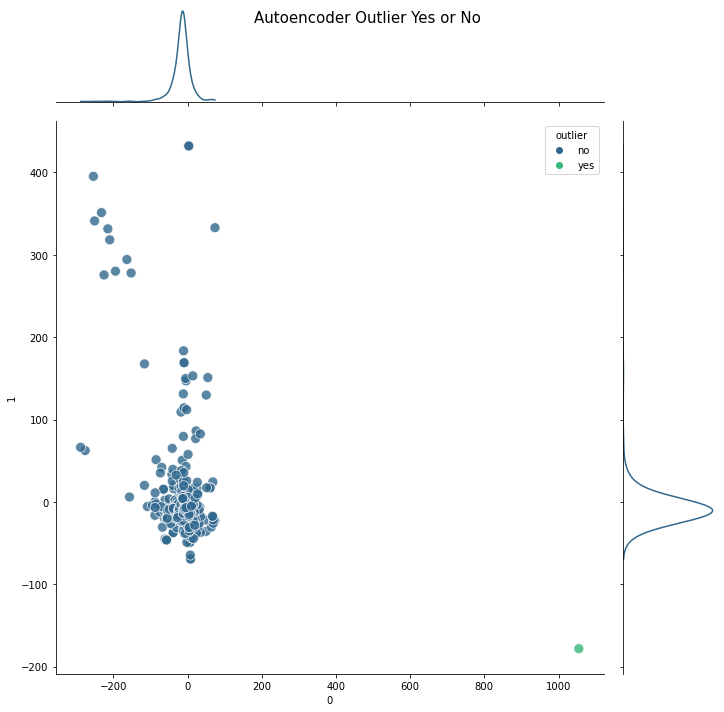

In [63]:
scatterPlot(
    x=0,
    y=1,
    df=Reduced,
    color=test.alcohol.map(lambda x: "yes" if x > 10 else "no").values,
    colorName="outlier",
    main_title="Autoencoder Outlier Yes or No",
    a=0.8
    )

<font size="+2" color="grey"><b>3.5 Isolation Forest </b></font><br><a id="3.5"></a>
<a href="#top" class="btn-xs btn-danger" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go back to the TOP</a>

What? Why not t-SNE? And what is an isolation forest?

As explained above, t-SNE and TriMap do not create a learned hypothesis, which means that it cannot be transferred to unseen data. There are actually approaches that try to solve the problem. E.g. the hypothesis is simply learned in a supervised manner or each unseen observation point is added to the learning data set one by one to know where it belongs. However, all these approaches are fraught with not insignificant problems. Therefore I decided to bring the so called isolation forest into the game.

The isolation forest separates all observations of a dataset - from each other. Thereby it is assumed that the observations, which are particularly easy to isolate, could be outliers. The shorter the path from the root to the leaf, the more likely an outlier. Thus, a cutoff criterion is needed here to determine what is an outlier.

In [64]:
isoForest=ISOF(random_state=0)
isoForest.fit(train.drop(columns=["quality"]))
dFunc = isoForest.decision_function(test.drop(columns=["quality"]))

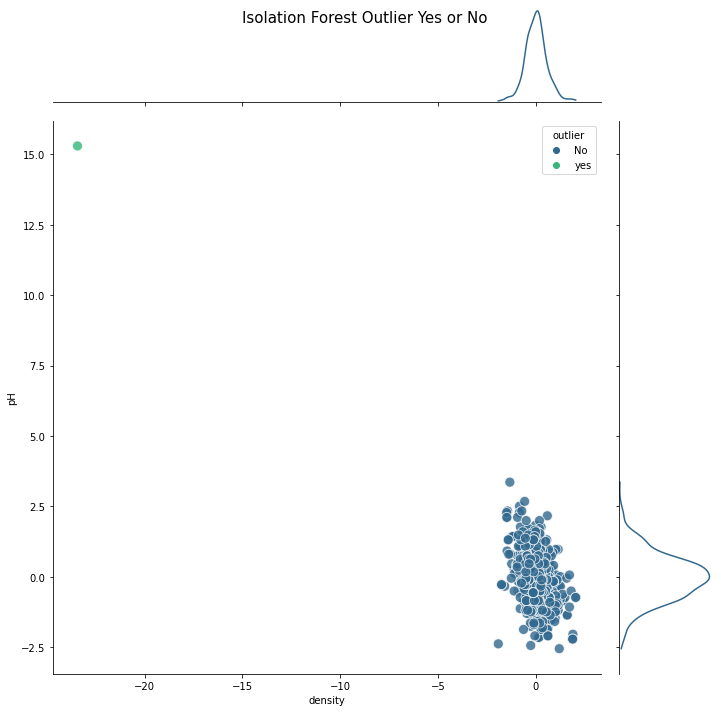

In [65]:
scatterPlot(
    x="density",
    y="pH",
    df=test.loc[:,["density","pH"]],
    color=["yes" if i < -0.15 else "No" for i in dFunc],
    colorName="outlier",
    main_title="Isolation Forest Outlier Yes or No",
    a=0.8
    )

<font size="+2" color="grey"><b>3.6 DBSCAN (Density Based Spatial Clustering of Applications with Noise) </b></font><br><a id="3.6"></a>
<a href="#top" class="btn-xs btn-danger" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go back to the TOP</a>

This clustering algorithm places a sphere around the observations and determines which of the observations overlap. When enough observations have been concatenated in this way, they are defined into a cluster. Observations that do not overlap are not included. Therefore, this algorithm is suitable for finding outliers. Important patrameters are therefore:

* the size of the spheres 
* the minimum number of neighboring observations for clustering

In [66]:
cluster = DBSCAN(eps=2.5, min_samples=50)
cluster.fit(train.drop(columns=["quality"]))
clustLabs = cluster.labels_

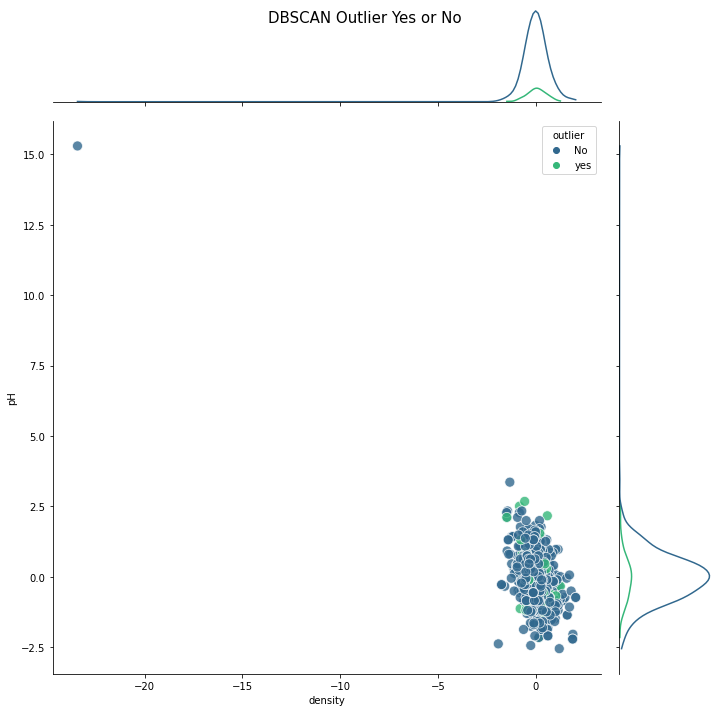

In [67]:
scatterPlot(
    x="density",
    y="pH",
    df=test.loc[:,["density","pH"]],
    color=["yes" if i ==-1 else "No" for i in clustLabs],
    colorName="outlier",
    main_title="DBSCAN Outlier Yes or No",
    a=0.8
    )

In [68]:
cluster = DBSCAN(eps=2, min_samples=20)
cluster.fit(Reduced)
clustLabs = cluster.labels_

Unfortunately, if we reduce the dimensions to two, it doesn't work so well either.

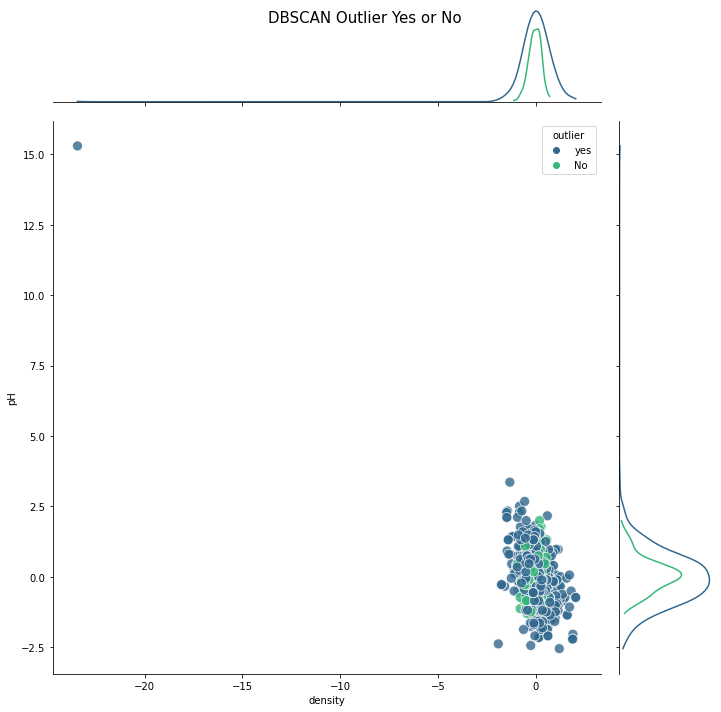

In [69]:
scatterPlot(
    x="density",
    y="pH",
    df=test.loc[:,["density","pH"]],
    color=["yes" if i ==-1 else "No" for i in clustLabs],
    colorName="outlier",
    main_title="DBSCAN Outlier Yes or No",
    a=0.8
    )

<font size="+3" color="grey"><b>4. Time Series Outliers </b></font><br><a id="4"></a>
<a href="#top" class="btn-xs btn-danger" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go back to the TOP</a>

Time series are a special case, as they are often non-stationary and often only a time series is available without further explanatory variables. I decided here to use a rather difficult dataset, the [Numenta Anomaly Benchmark](https://www.kaggle.com/boltzmannbrain/nab) dataset provided by [boltzmannbrain](https://www.kaggle.com/boltzmannbrain).

![](https://numenta.com/wp-content/uploads/2019/03/heartbeat@2x-1024x341.png)

In [70]:
train = pd.read_csv("../input/nab/artificialNoAnomaly/artificialNoAnomaly/art_daily_small_noise.csv")
train =  Normalization(train, ["value"])
train["timestamp"] = train.timestamp.astype("datetime64")

test1 = pd.read_csv("../input/nab/artificialWithAnomaly/artificialWithAnomaly/art_daily_jumpsdown.csv")
test1 =  Normalization(test1, ["value"])
test1["timestamp"] = test1.timestamp.astype("datetime64")

test2 = pd.read_csv("../input/nab/artificialWithAnomaly/artificialWithAnomaly/art_daily_jumpsup.csv")
test2 =  Normalization(test2, ["value"])
test2["timestamp"] = test2.timestamp.astype("datetime64")

It is important in feature engineering not to include transient data such as time or year. These do not repeat when they have expired.

In [71]:
def FeatEng(DF):
    
    DF=DF.copy()
    
    DF["weekday"] = DF.timestamp.dt.day_of_week
    DF["hour"] = DF.timestamp.dt.hour
    DF["minute"] = DF.timestamp.dt.minute
    DF["second"] = DF.timestamp.dt.second

    DF["mean20"] = DF.value.rolling(window=20).mean()#.fillna(0.7)
    DF["mean600"] = DF.value.rolling(window=600).mean()#.fillna(0.7)
    DF["max"] = DF.value.rolling(window=10).max()#.fillna(0.7)
    DF["min"] = DF.value.rolling(window=10).min()#.fillna(0.7)

    DF["lag1"] = DF.value.shift(periods=1, fill_value=0.7)
    DF["lag20"] = DF.value.shift(periods=20, fill_value=0.7)
    DF["lag30"] = DF.value.shift(periods=30, fill_value=0.7)
    DF["lag100"] = DF.value.shift(periods=100, fill_value=0.7)
    DF["lag200"] = DF.value.shift(periods=200, fill_value=0.7)
    DF["lag300"] = DF.value.shift(periods=300, fill_value=0.7)
    
    DF.dropna(inplace=True)

    return DF

In [72]:
train = FeatEng(train)
test1 = FeatEng(test1)
test2 = FeatEng(test2)

time = test1.timestamp

First, let's take a look at the training dataset and the two test datasets

In [73]:
pltDf = pd.concat([train[["timestamp", "value"]], test1[["timestamp", "value"]], test2[["timestamp", "value"]]]).reset_index(drop=True)

l = train.shape[0]*["train"]
l.extend(train.shape[0]*["test1"])
l.extend(train.shape[0]*["test2"])

pltDf["sample"] = l

plot = px.line(
    pltDf,
    x="timestamp",
    y="value",
    color = "sample",
    color_discrete_sequence=px.colors.qualitative.G10,
    template="simple_white"
    )

plot.add_vrect(
    x0="2014-04-11 08:00", 
    x1="2014-04-11 20:50", 
    annotation_text="outlier area", 
    annotation_position="top left",
    fillcolor="grey", 
    opacity=0.25, 
    line_width=0
    )

plot

<font size="+2" color="grey"><b>4.1 PCA </b></font><br><a id="4.1"></a>
<a href="#top" class="btn-xs btn-danger" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go back to the TOP</a>

In [74]:
pca = PCA(n_components=train.shape[1]-1, 
          random_state=1
          )

pca.fit(train.drop(columns=["timestamp"]))
transformed1 = pca.transform(test1.drop(columns=["timestamp"]))
transformed2 = pca.transform(test2.drop(columns=["timestamp"]))
Reduced_PCA1 = pd.DataFrame(transformed1)
Reduced_PCA2 = pd.DataFrame(transformed2)

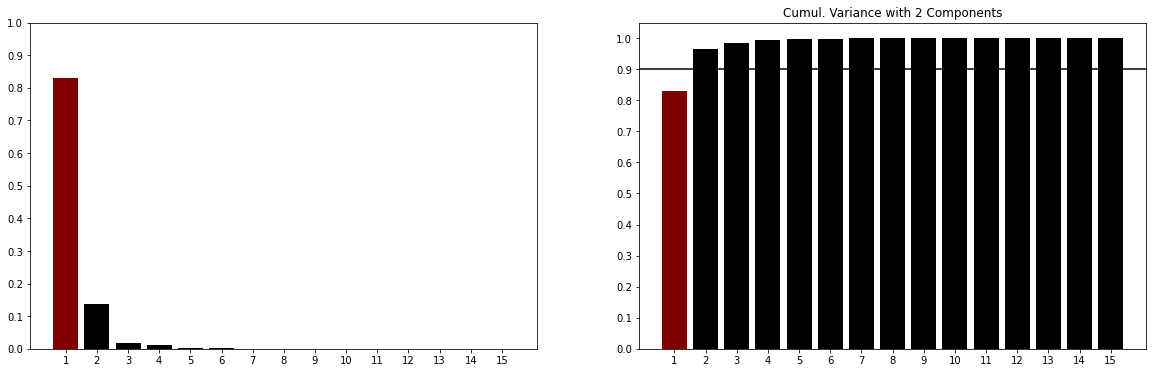

In [75]:
barPlot(y=pca.explained_variance_ratio_, threshold=0.9)

One needs just two components co capture more than 90% of the variance of the data. No surprise, it originally consists of only one time series.

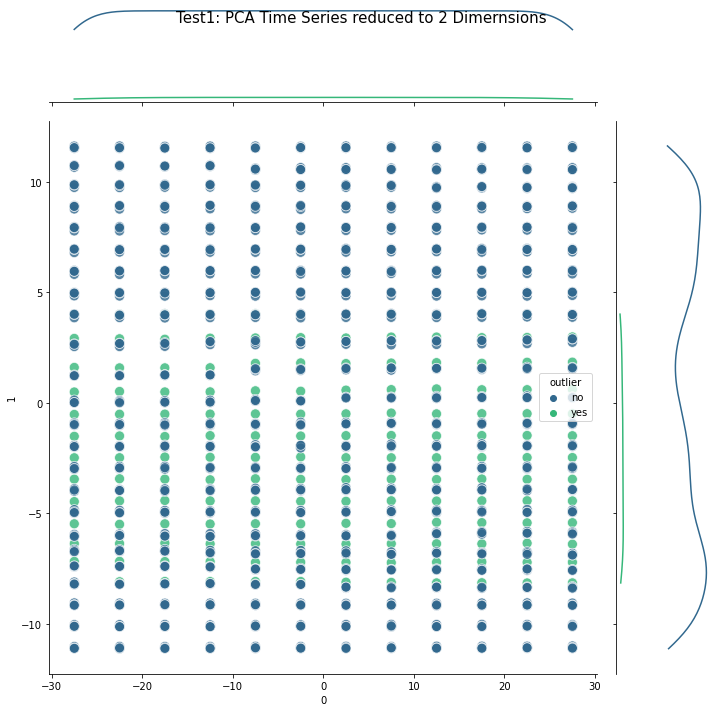

In [76]:
scatterPlot(x=0,
            y=1,
            df=Reduced_PCA1,
            color=time.map(lambda x: "yes" if (x > pd.to_datetime("2014-04-11 08:00")) & (x <= pd.to_datetime("2014-04-11 20:50")) else "no").values,
            colorName="outlier",
            main_title="Test1: PCA Time Series reduced to 2 Dimernsions",
            a=0.8
            )

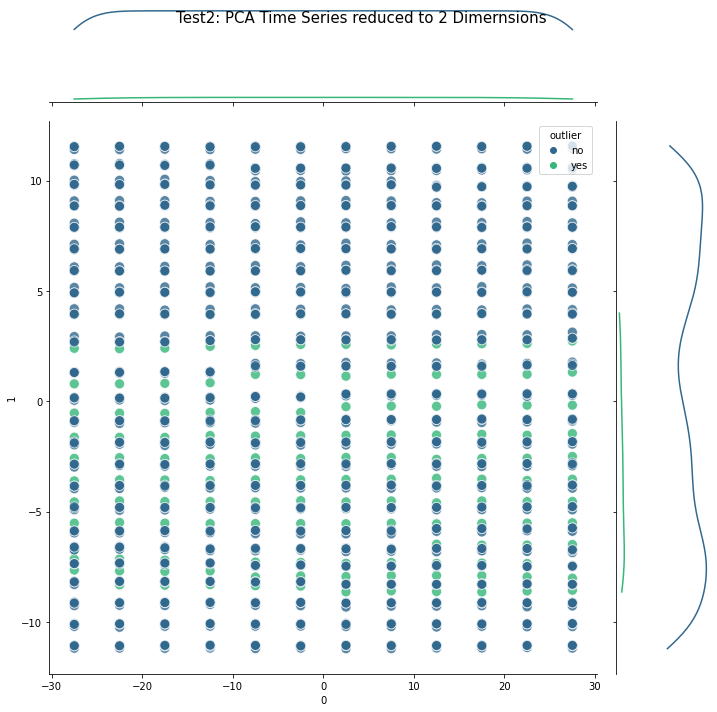

In [77]:
scatterPlot(x=0,
            y=1,
            df=Reduced_PCA2,
            color=time.map(lambda x: "yes" if (x > pd.to_datetime("2014-04-11 08:00")) & (x <= pd.to_datetime("2014-04-11 20:50")) else "no").values,
            colorName="outlier",
            main_title="Test2: PCA Time Series reduced to 2 Dimernsions",
            a=0.8
            )

<font size="+2" color="grey"><b>4.2 UMAP </b></font><br><a id="4.2"></a>
<a href="#top" class="btn-xs btn-danger" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go back to the TOP</a>

In [78]:
UMP = umap.UMAP(
    n_neighbors=20, 
    min_dist=0.5,
    n_components=2,
    spread=3
    )

UMP.fit(train.drop(columns=["timestamp"]))

transformed1 = UMP.transform(test1.drop(columns=["timestamp"]))
transformed2 = UMP.transform(test2.drop(columns=["timestamp"]))
Reduced1 = (pd.DataFrame(transformed1))
Reduced2 = (pd.DataFrame(transformed2))

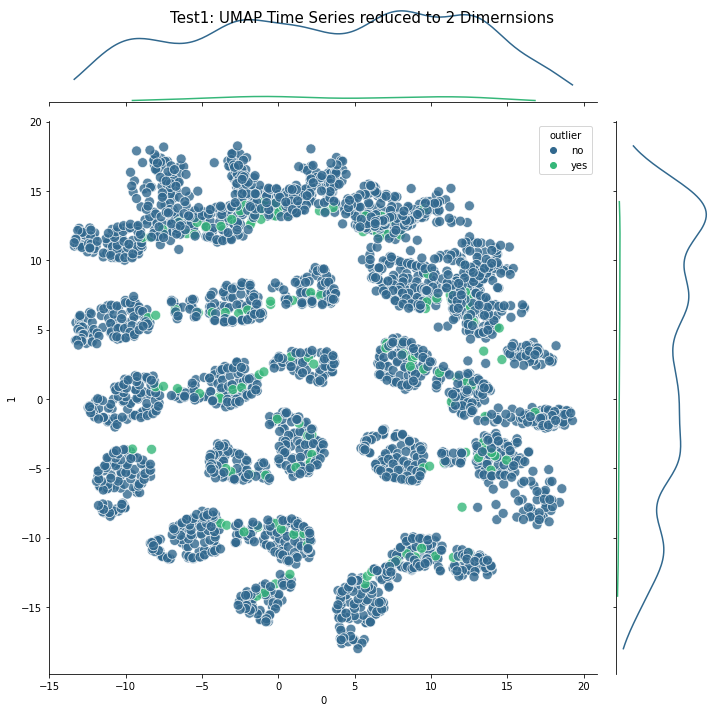

In [79]:
scatterPlot(x=0,
            y=1,
            df=Reduced1,
            color=time.map(lambda x: "yes" if (x > pd.to_datetime("2014-04-11 08:00")) & (x <= pd.to_datetime("2014-04-11 20:50")) else "no").values,
            colorName="outlier",
            main_title="Test1: UMAP Time Series reduced to 2 Dimernsions",
            a=0.8
            )

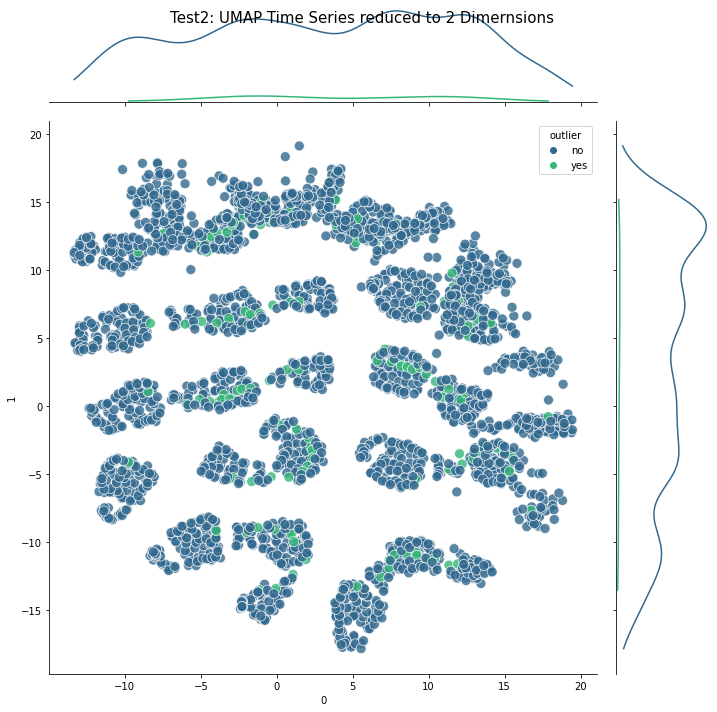

In [80]:
scatterPlot(x=0,
            y=1,
            df=Reduced2,
            color=time.map(lambda x: "yes" if (x > pd.to_datetime("2014-04-11 08:00")) & (x <= pd.to_datetime("2014-04-11 20:50")) else "no").values,
            colorName="outlier",
            main_title="Test2: UMAP Time Series reduced to 2 Dimernsions",
            a=0.8
            )

<font size="+2" color="grey"><b>4.3 Isolation Forest </b></font><br><a id="4.3"></a>
<a href="#top" class="btn-xs btn-danger" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go back to the TOP</a>

In the isolation forest we train two different variants with different randomized feature selections.

In [81]:
isoForest=ISOF(
    random_state=0, 
    n_estimators=200, 
    max_features=0.5
    )

isoForest.fit(train.drop(columns=["timestamp"]))
dFunc1 = isoForest.decision_function(test1.drop(columns=["timestamp"]))

isoForest=ISOF(
    random_state=0, 
    n_estimators=200, 
    max_features=0.1
    )

isoForest.fit(train.drop(columns=["timestamp"]))

dFunc2 = isoForest.decision_function(test2.drop(columns=["timestamp"]))

<font size="+2" color="grey"><b>4.4 DBSCAN </b></font><br><a id="4.4"></a>
<a href="#top" class="btn-xs btn-danger" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go back to the TOP</a>

In [82]:
cluster = DBSCAN(eps=3.5, min_samples=25)
cluster.fit(test1.drop(columns=["timestamp"]))
clustLabs1 = cluster.labels_
cluster.fit(test1.drop(columns=["timestamp"]))
clustLabs2 = cluster.labels_

For the isolation forest it was very easy to find the cutoff. This is done by simply coloring the time series as a scatterplot with all possible path depths (given by the decision function). For DBSCAN it was also easy. But here we had to experiment a little with the sphere size and the number of neighbors.

For UMAP and PCA, no meaningful cutoff has been found by which outliers can be separated from the regular observations. Therefore, so that you can get an idea, I have colored the time series here with the value of the reduced dimension. 

In [83]:
test1["PCA"] = Reduced_PCA1[0].values
test1["iso"] = ["yes" if i < -0.115 else "no" for i in dFunc1]
test1["umap"] = Reduced1[0].values
test1["DBSCAN"] = ["yes" if i == -1 else "no" for i in clustLabs1]

test2["PCA"] = Reduced_PCA2[0].values
test2["iso"] = ["yes" if i < -0.08 else "no" for i in dFunc2]
test2["umap"] = Reduced2[0].values
test2["DBSCAN"] = ["yes" if i == -1 else "no" for i in clustLabs2]

<font size="+2" color="grey"><b>4.5 Time Series Results </b></font><br><a id="4.5"></a>
<a href="#top" class="btn-xs btn-danger" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go back to the TOP</a>

In [84]:
plotP1 = px.scatter(
    test1,
    color="PCA",
    x="timestamp",
    y="value",
    title="PCA test1",
    marginal_y="histogram",
    template="simple_white"
    )

plotP1.add_vrect(
    x0="2014-04-11 08:00", 
    x1="2014-04-11 20:50", 
    annotation_text="outlier area", 
    annotation_position="top left",
    fillcolor="grey", 
    opacity=0.25, 
    line_width=0
    )

plotP1

In [85]:
plotP2 = px.scatter(
    test2,
    color="PCA",
    x="timestamp",
    y="value",
    title="PCA test2",
    marginal_y="histogram",
    template="simple_white"
    )

plotP2.add_vrect(
    x0="2014-04-11 08:00", 
    x1="2014-04-11 20:50", 
    annotation_text="outlier area", 
    annotation_position="top left",
    fillcolor="grey", 
    opacity=0.25, 
    line_width=0
    )

plotP2

In [86]:
plotU1 = px.scatter(
    test1,
    color="umap",
    x="timestamp",
    y="value",
    title="UMAP test1",
    marginal_y="histogram",
    template="simple_white"
    )

plotU1.add_vrect(
    x0="2014-04-11 08:00", 
    x1="2014-04-11 20:50", 
    annotation_text="outlier area", 
    annotation_position="top left",
    fillcolor="grey", 
    opacity=0.25, 
    line_width=0
    )

plotU1

In [87]:
plotU2 = px.scatter(
    test2,
    color="umap",
    x="timestamp",
    y="value",
    title="UMAP test2",
    marginal_y="histogram",
    template="simple_white"
    )

plotU2.add_vrect(
    x0="2014-04-11 08:00", 
    x1="2014-04-11 20:50", 
    annotation_text="outlier area", 
    annotation_position="top left",
    fillcolor="grey", 
    opacity=0.25, 
    line_width=0
    )

plotU2

In [88]:
plotI1 = px.scatter(
    test1,
    color="iso",
    x="timestamp",
    y="value",
    title="Isolation Forest test 1",
    marginal_y="histogram",
    template="simple_white",
    color_discrete_sequence=["green", "red"]
    )

plotI1.add_vrect(
    x0="2014-04-11 08:00", 
    x1="2014-04-11 20:50", 
    annotation_text="outlier area", 
    annotation_position="top left",
    fillcolor="grey", 
    opacity=0.25, 
    line_width=0
    )

plotI1

In [89]:
plotI2 = px.scatter(
    test2,
    color="iso",
    x="timestamp",
    y="value",
    title="Isolation Forest test 2",
    marginal_y="histogram",
    template="simple_white",
    color_discrete_sequence=["green", "red"]
    )

plotI2.add_vrect(
    x0="2014-04-11 08:00", 
    x1="2014-04-11 20:50", 
    annotation_text="outlier area", 
    annotation_position="top left",
    fillcolor="grey", 
    opacity=0.25, 
    line_width=0
    )

plotI2

In [90]:
plotD1 = px.scatter(
    test1,
    color="DBSCAN",
    x="timestamp",
    y="value",
    title="DBSCAN test 1",
    marginal_y="histogram",
    template="simple_white",
    color_discrete_sequence=["green", "red"]
    )

plotD1.add_vrect(
    x0="2014-04-11 08:00", 
    x1="2014-04-11 20:50", 
    annotation_text="outlier area", 
    annotation_position="top left",
    fillcolor="grey", 
    opacity=0.25, 
    line_width=0
    )

plotD1

In [91]:
plotD2 = px.scatter(
    test2,
    color="DBSCAN",
    x="timestamp",
    y="value",
    title="DBSCAN test 2",
    marginal_y="histogram",
    template="simple_white",
    color_discrete_sequence=["green", "red"]
    )

plotD2.add_vrect(
    x0="2014-04-11 08:00", 
    x1="2014-04-11 20:50", 
    annotation_text="outlier area", 
    annotation_position="top left",
    fillcolor="grey", 
    opacity=0.25, 
    line_width=0
    )

plotD2

<font size="+2" color="grey"><b>4.6 Autoencoder LSTM </b></font><br><a id="4.6"></a>
<a href="#top" class="btn-xs btn-danger" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go back to the TOP</a>

One idea is of course to use an autoencoder for time series. LSTM is a natural choice for this. 

A LSTM is a neural net, which sequentially loops after each observation. This means that the observations are equipped with a forgetting structure, similar to exponential smoothing. First, an observation is passed through the neural net. From the second observation on, the weighting of the first observation is still there. Therefore, it is first decided which part of the so-called cell state should be forgotten. Then it is seen which part of the new observation should be added to the cell state before the process is repeated. One can say that the cell state is the long term memory and the hidden state is the short term memory, as in simple RNNs.


First we have to reshape the dataset into the structure [samples, timesteps, features]

In [92]:
train = train.reset_index(drop=True).loc[3:,:]
test1 = test1.reset_index(drop=True).loc[3:,:]
test2 = test2.reset_index(drop=True).loc[3:,:]
train.shape

(3430, 16)

In [93]:
test1.drop(columns=["iso", "umap", "PCA", "DBSCAN"], inplace=True)
test2.drop(columns=["iso", "umap", "PCA", "DBSCAN"], inplace=True)
dropCols = ["timestamp"]
#dropCols.extend([i for i in train.columns if "lag" in i])
#dropCols.extend([i for i in train.columns if "mean" in i])
#dropCols.extend(["hour", "weekday", "minute", "second"])

y = train["value"].values.reshape((-1, 10, 1))

train = train.drop(columns=dropCols).to_numpy()
train = train.reshape((-1, 10, train.shape[1]))# samples, timesteps, features

time = test1.timestamp
test1 = test1.drop(columns=dropCols).to_numpy()
test1 = test1.reshape((-1, 10, test1.shape[1]))

test2 = test2.drop(columns=dropCols).to_numpy()
test2 = test2.reshape((-1, 10, test2.shape[1]))

This special autoencoder uses all features, but learns only the time series, using two dimensions as encoder. It is therefore not a classic autoencoder. However, this variant works better for the reconstruction of the time series.

In [94]:
np.random.seed(123)
tf.random.set_seed(12)

comp=2
  
INPUT = ks.layers.Input(shape=(train.shape[1], train.shape[2]), name="EncoderInput")

ENCO = ks.layers.LSTM(
    32, 
    activation='relu', 
    return_sequences = True,
    stateful=False,
    dropout=0.2)(INPUT)

ENCO = ks.layers.LSTM(
    comp, 
    activation = "relu", 
    return_sequences = True, 
    stateful=False,
    name = "compression")(ENCO)

ENC = ks.Model(inputs=INPUT, outputs=ENCO)

DECO = ks.layers.Dense(1)(ENCO)

AE = ks.Model(inputs=INPUT, outputs=DECO)


So this is the structure of the autoencoder.

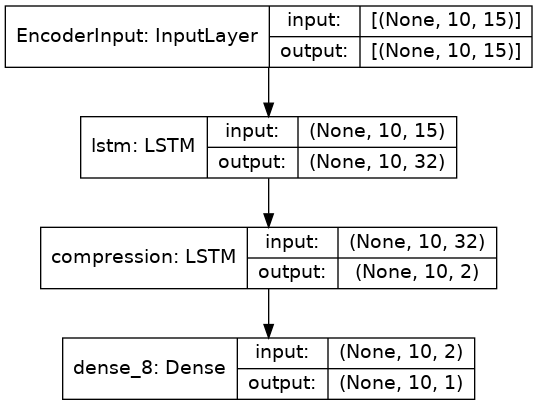

In [95]:
ks.utils.plot_model(
    AE, 
    show_shapes=True, 
    show_layer_names=True
    )

In [96]:
lrReducer = ks.callbacks.ReduceLROnPlateau(    
    monitor="val_loss",
    factor=0.5,
    patience=10,
    verbose=0,
    mode="auto",
    min_delta=0.0001,
    cooldown=0,
    min_lr=0.000001,
    )

In [97]:
leRa=0.01
dec=0.00000
eps=2500
print("Learningrate ok: " + str(leRa - dec * 200 >= 0))
bs=train.shape[0]*10

optimizer = ks.optimizers.Adamax(lr=leRa, decay=dec, clipvalue=10)
AE.compile(optimizer = optimizer, loss = 'mae')

history = ks.callbacks.History()

AE.fit(
    x=train, 
    y=y, 
    epochs = eps, 
    batch_size = bs, 
    shuffle = False,
    callbacks=[history, lrReducer],
    verbose=0
    )

print(AE.evaluate(train, y))

Encoded1 = AE.predict(
   x=test1, 
   workers = 1, 
   use_multiprocessing = True
)

Encoded2 = AE.predict(
   x=test2, 
   workers = 1, 
   use_multiprocessing = True
)

Encoded1 = pd.DataFrame(np.reshape(Encoded1, (3430, y.shape[2])))
Encoded2 = pd.DataFrame(np.reshape(Encoded2, (3430, y.shape[2])))

ReducedTRAIN = ENC.predict(
   x=train, 
   workers = 1, 
   use_multiprocessing = True
)

ReducedTRAIN = pd.DataFrame(np.reshape(ReducedTRAIN, (3430, comp)))

Reduced1 = ENC.predict(
   x=test1, 
   workers = 1, 
   use_multiprocessing = True
)

Reduced2 = ENC.predict(
   x=test2, 
   workers = 1, 
   use_multiprocessing = True
)

Reduced1 = pd.DataFrame(np.reshape(Reduced1, (3430, comp)))
Reduced2 = pd.DataFrame(np.reshape(Reduced2, (3430, comp)))

Learningrate ok: True
11/11 [==============================] - 0s 3ms/step - loss: 0.1126
0.11264528334140778


In [98]:
def reshapeAdd(DF, t, tr, reduced, encoded, reducedtrain):
    """DF: Data Frame, t: time, tr: train, reduced: Reduced#, encoded: Encoded#"""
    
    DF=DF.copy()
    DF = pd.DataFrame(DF.reshape((-1, tr.shape[2])))

    DF["timestamp"] = t.values
    DF["transformed1"] = reduced[0].values
    DF["transformed2"] = reduced[1].values
    DF["trained1"] = reducedtrain[0].values
    DF["trained2"] = reducedtrain[1].values
    DF["Encoded"] = encoded[0]
    DF.rename(columns={0: "value"}, inplace=True)
    
    return DF

In [99]:
test1 = reshapeAdd(test1, time, train, Reduced1, Encoded1, ReducedTRAIN)
test2 = reshapeAdd(test2, time, train, Reduced2, Encoded2, ReducedTRAIN)

First, we look at whether there are differences between the outliers and regular patterns in the reduced two-dimensional space. 
First for test1:

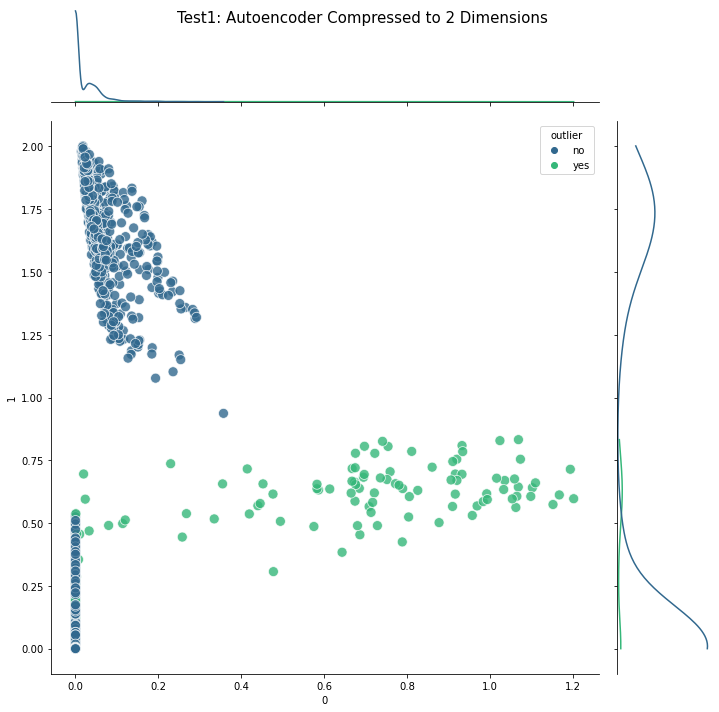

In [100]:
scatterPlot(
    x=0,
    y=1,
    df=Reduced1,
    color=time.map(lambda x: "yes" if (x > pd.to_datetime("2014-04-11 08:00")) & (x <= pd.to_datetime("2014-04-11 20:50")) else "no").values,
    colorName="outlier",
    main_title="Test1: Autoencoder Compressed to 2 Dimensions",
    a=0.8
    )

Then for test2:

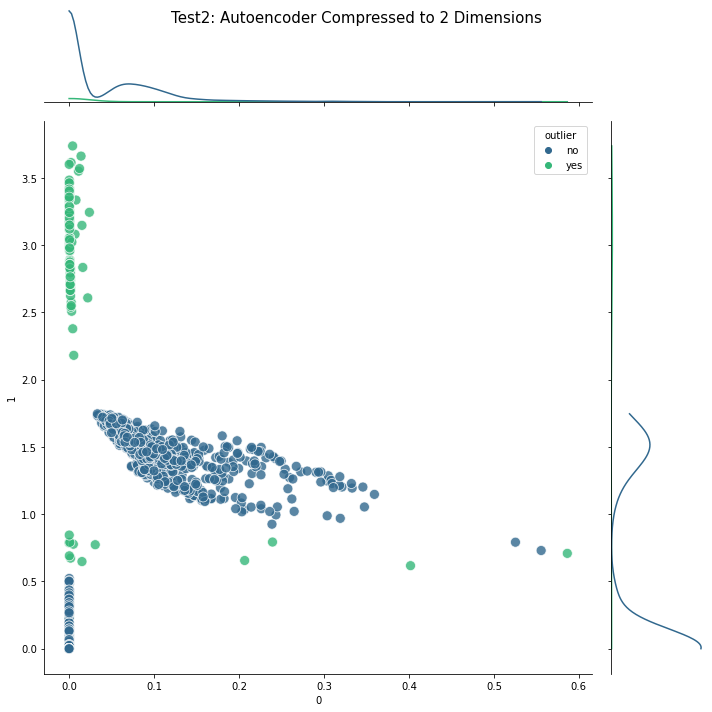

In [101]:
scatterPlot(
    x=0,
    y=1,
    df=Reduced2,
    color=time.map(lambda x: "yes" if (x > pd.to_datetime("2014-04-11 08:00")) & (x <= pd.to_datetime("2014-04-11 20:50")) else "no").values,
    colorName="outlier",
    main_title="Test2: Autoencoder Compressed to 2 Dimensions",
    a=0.8
    )

It is clearly visible that the outliers exist in certain areas. So let's see if observations also exist in these areas for the learned two dimensions. Because if not, then we could exploit this circumstance....

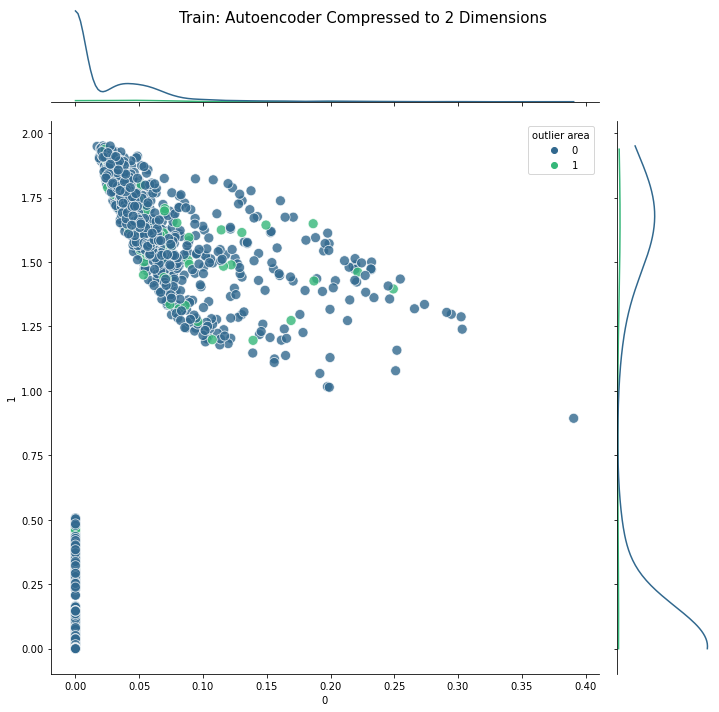

In [102]:
scatterPlot(
    x=0,
    y=1,
    df=ReducedTRAIN,
    color=time.map(lambda x: 1 if (x > pd.to_datetime("2014-04-11 08:00")) & (x <= pd.to_datetime("2014-04-11 20:50")) else 0).values,
    colorName="outlier area",
    main_title="Train: Autoencoder Compressed to 2 Dimensions",
    a=0.8
    )

...In fact, at the points where the outliers appear, no observations exist in the learned hypothesis. That is, we can simply compare the learned hypothesis with the test data (test1 and test2). How do we do this? Let's take a look at the distributions of the individual dimensions. We compare the distributions of the learned hypothesis with the test1 and test2 data. 

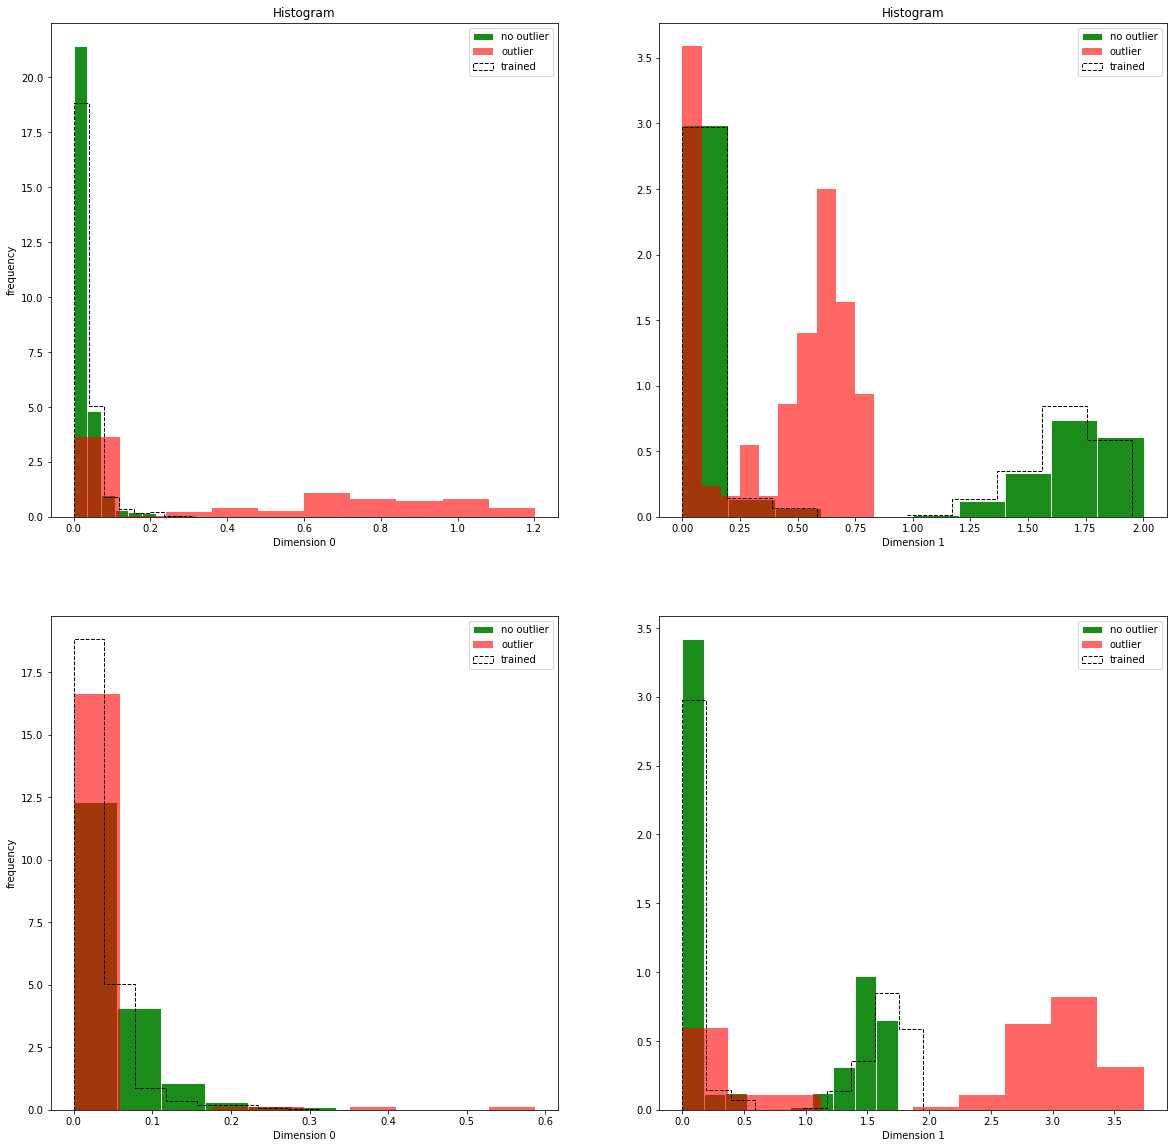

In [103]:
def vizDF(DF, t, num):
    
    DF=DF.copy()
    vDF = DF[[f"transformed{num}", "timestamp", f"trained{num}"]]
    
    vDF["outlier"] = t.map(lambda x: "yes" if (x > pd.to_datetime("2014-04-11 08:00")) & 
                           (x <= pd.to_datetime("2014-04-11 20:50")) else "no").values
    
    vDF["type"] = f"dim{num}"
    vDF.rename(columns={f"transformed{num}":"transformed", f"trained{num}": "trained"},inplace = True)
    
    return vDF

vDF1 = pd.concat([vizDF(test1, time, 1), vizDF(test1, time, 2)])
vDF1["testNo"] = "test1"
vDF2 = pd.concat([vizDF(test2, time, 1), vizDF(test2, time, 2)])
vDF2["testNo"] = "test2"
vDF = pd.concat([vDF1, vDF2])
vDF.reset_index(drop=True, inplace=True)

fig, p = plt.subplots(nrows=2, ncols=2, figsize=(20,20))

bin_array=np.array([[[10, 10, 10],[10, 10, 10]],[[10, 10, 10],[10, 10, 10]]])

for c in range(2):
    for r in range(2):
        
        p[r, c].hist(
            vDF.transformed.loc[(vDF.type == f"dim{c+1}") & (vDF.outlier == "no") & (vDF.testNo == f"test{r+1}")], 
            bins = bin_array[r,c,0], 
            density=True, 
            histtype='bar', 
            color="green", 
            label='no outlier', 
            edgeColor = 'white',
            alpha=0.9
            )

        p[r, c].hist(
            vDF.transformed.loc[(vDF.type == f"dim{c+1}") & (vDF.outlier == "yes") & (vDF.testNo == f"test{r+1}")], 
            bins = bin_array[r,c,1], 
            density=True, 
            histtype='bar', 
            color="red", 
            label='outlier', 
            alpha=0.6
            )

        p[r, c].hist(
            vDF.trained.loc[(vDF.type == f"dim{c+1}") & (vDF.testNo == f"test{r+1}")], 
            bins = bin_array[r,c,2], 
            density=True, 
            histtype='step', 
            color="black", 
            linestyle='dashed',
            rwidth=3,
            label='trained', 
            alpha=1
            )

        p[r, c].legend(loc='upper right')
        p[r, c].set_xlabel(f"Dimension {c}")

        if c == 0:
            p[r, c].set_ylabel('frequency')

        if r == 0:
            p[r, c].set_title('Histogram')

plt.show()

As can be seen, the green non-outliers and the black line (trained) correspond with each other. Whereby the outliers (red) are found in other places. 

The distribution density of the learned hypothesis is close to zero for the outliers. Therefore, we use a kernel density estimator that first gives the probabilities of an observation occurring based on the learned hypothesis. It should be noted that the probability for a given observation is zero. However, if we define that each observation is x = x + e, where e is infinitesimally small, we can consider the value of the kernel density estimator at x as the probability of x occurring. 

Thus, we are also able to determine the probability of whether or not the observation is an outlier.

To be honest, however, the method could also have been applied to the original time series. However, this procedure should show that the result of the LSTM is quite suitable for outlier detection in time series. 

<font size="+2" color="grey"><b>4.7 KDE (Kernel Density Estimator) </b></font><br><a id="4.7"></a>
<a href="#top" class="btn-xs btn-danger" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go back to the TOP</a>

In [104]:
k = kde(
    bandwidth=0.75, 
    kernel='gaussian'
    )

for i in range(1,3):
    for j in range(1,3):
        k.fit(globals()[f"test{i}"][f"trained{j}"].values.reshape(-1, 1))   
        globals()[f"test{i}"]["probaDim{}".format(j)] = np.exp(k.score_samples(globals()[f"test{i}"][f"transformed{j}"].values.reshape(-1, 1)))

In [105]:
test1["proba"] = 1-(test1.probaDim1 * 0.5 + test1.probaDim2 * 0.5)
test2["proba"] = 1-(test2.probaDim1 * 0.5 + test2.probaDim2 * 0.5)

So what does the reconstructed time series look like? 

In the following we plot the two time series replicated by the autoencoder test1 and test2 - also to show that the LSTM autoencoder worked very well. In addition, we color each observation with the probability whether it is an outlier. 

In [106]:
fig = make_subplots(rows=2, cols=1)

fig.add_trace(
    go.Scatter(
        x=test1.timestamp, 
        y=test1.Encoded, 
        mode='markers',
        showlegend=False,
        hovertemplate =
        '<br>%{x}'+
        '<br><b>Encoded</b>: %{y}'+
        '<br><b>Probability</b>:%{text}',
        text = ['{}'.format(i) for i in test1.proba],
        name='test1',
         marker=dict(
            size=6,
            color=test1.proba, 
            colorscale='Tealrose', 
            showscale=True
            )
        ),
    row=1, col=1
)

fig.add_vrect(
    x0="2014-04-11 08:00", 
    x1="2014-04-11 20:50", 
    annotation_text="outlier area", 
    annotation_position="top left",
    fillcolor="#DCDCDC", 
    opacity=0.25, 
    line_width=0
    )

fig.add_trace(
    go.Scatter(
        x=test2.timestamp, 
        y=test2.Encoded, 
        mode='markers',
        showlegend=False,
        hovertemplate =
        '<br>%{x}'+
        '<br><b>Encoded</b>: %{y}'+
        '<br><b>Probability</b>:%{text}',
        text = ['{}'.format(i) for i in test2.proba],
        name='test2',
        marker=dict(
            size=6,
            color=test2.proba,
            colorscale='Tealrose'
            )
        ),
    row=2, col=1
)

fig.add_vrect(
    x0="2014-04-11 08:00", 
    x1="2014-04-11 20:50", 
    annotation_text="outlier area", 
    annotation_position="top left",
    fillcolor="#DCDCDC", 
    opacity=0.25, 
    line_width=0
    )

fig.update_layout(height=800, width=800, title_text="LSTM Outlier Detection", template="simple_white")
fig.show()

<font size="+3" color="grey"><b>5. Conclusion </b></font><br><a id="5"></a>
<a href="#top" class="btn-xs btn-danger" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go back to the TOP</a>

It has been shown that initially **t-SNE** and TriMap carried the most information in the wine dataset. **UMAP** showed the most robust results, as R squared, the mean absolute error but also the maximum error were well balanced. **PaCMAP** and Autoencoder also did well, with **PCA** taking the least information within two dimensions. 

The projection of the airplane has shown that each method has its justification under certain circumstances. In many cases, **PCA** is no longer even mentioned when comparing dimension reduction methods. Here, however, **PCA** has impressively proven that it can sometimes even outperform the other methods. **Autoencoders** have shown here that they are also well able to preserve global structures. Among the other methods, only **UMAP** showed neither local nor global structures.

**PCA** showed a very robust result for the Vodka otlier. For time series it was not able to deliver a convincing result.

As method for outlier analsye, **UMAP** was found to be unsuitable for both the cross section and time series datasets. 

**DBSCAN**, as the only clustering algorithm used here, showed no usable results in the cross section data (wine dataset). For the time series, on the other hand, the results were very satisfactory.

The **Isolation Forest** produced very convincing results for both the cross section (wine dataset) and the time series. However, one has to determine the cut-off criterion that fits.

**Autoencoders** were also able to separate outliers easily in the cross section. For the time series, the special LSTM autoencoder showed that the replication of the time series was straightforward. The two-dimensional bottleneck separated the outliers. However, we had to apply kernel density estimation again to separate the outliers from the other observations. 

to be continued...